This notebook is used to visualize the CNN outputs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
from image_datasets.imagedataset import ImageDataset
from torch.utils.data import random_split, DataLoader
from torchvision.transforms import transforms
from torchvision.io import read_image
from matplotlib import pyplot as plt

In [3]:
# Import model
from models.dropoutModel import DropoutModel

# Load model snapshot
dict_path = './model_states/model_conv4_1.pth'

model = DropoutModel()
model.load_state_dict(torch.load(dict_path))

<All keys matched successfully>

In [4]:
norm_transform = transforms.Normalize(
    (132.3501, 127.2977, 131.0638),
    (55.5031, 62.3274, 64.1869)
)

In [5]:
img = read_image('./data/asl_alphabet_train/A/A1.jpg').float()[:, 4:-4, 4:-4]
img = norm_transform.forward(img)

(32, 96, 96)


C:\Users\David\AppData\Local\Temp\ipykernel_26256\2959994441.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


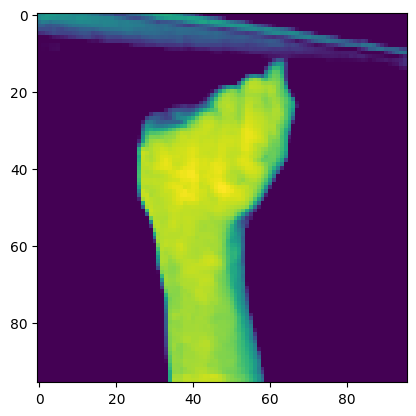

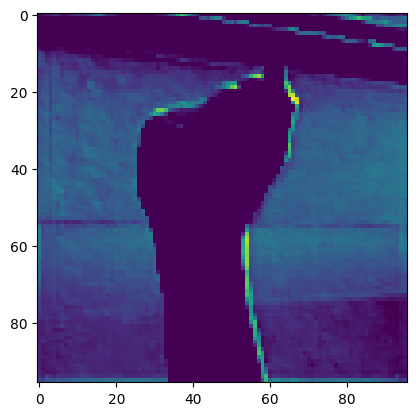

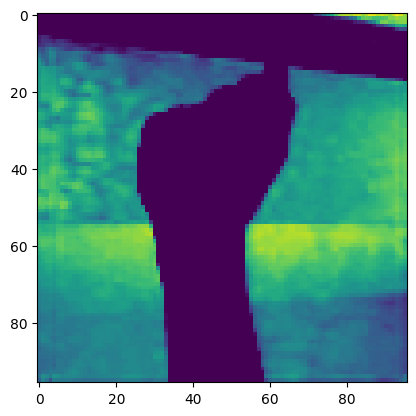

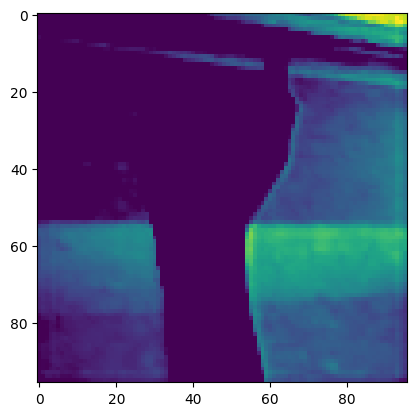

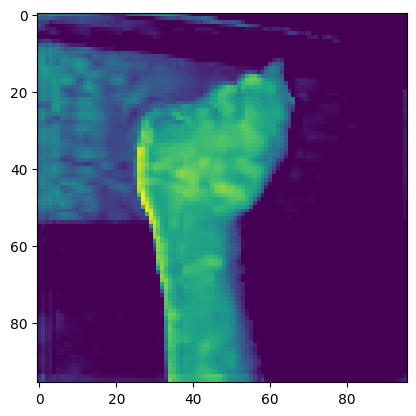

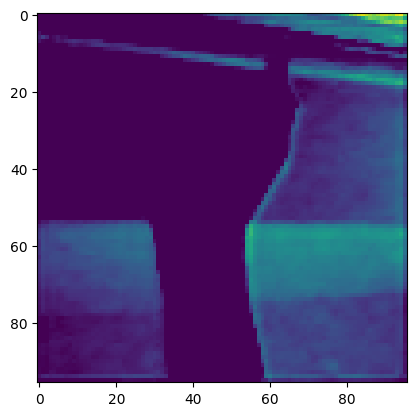

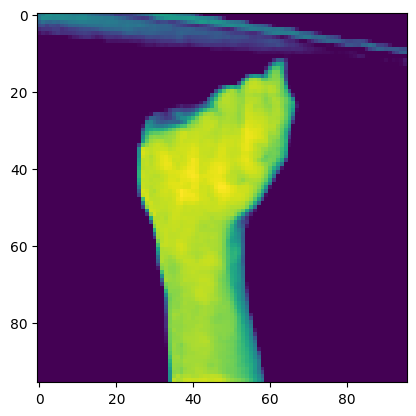

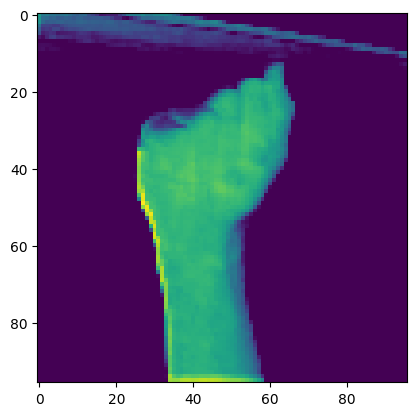

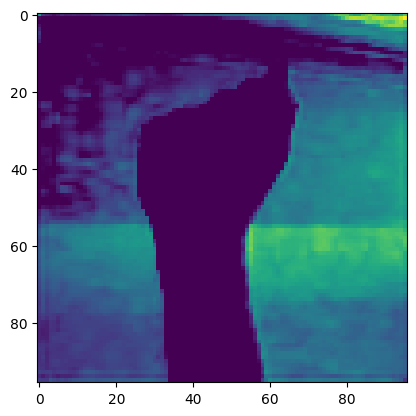

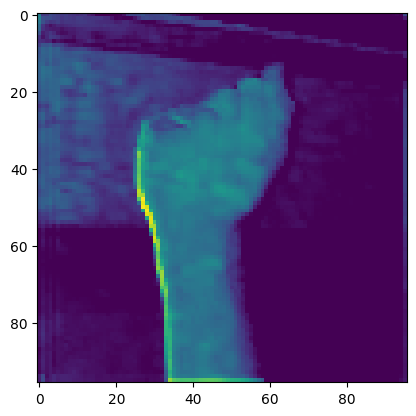

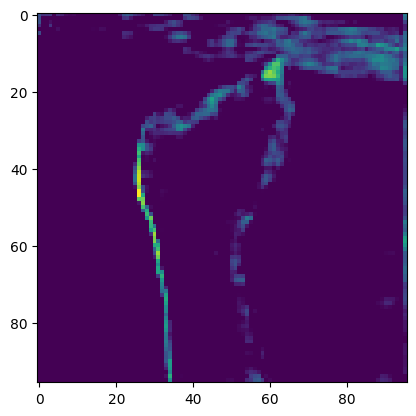

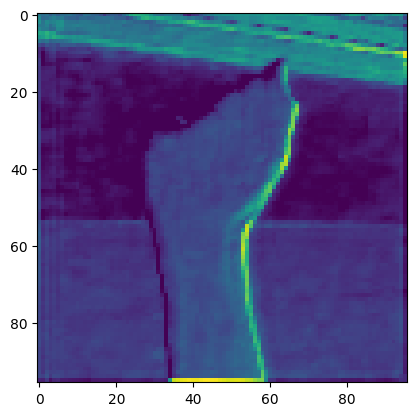

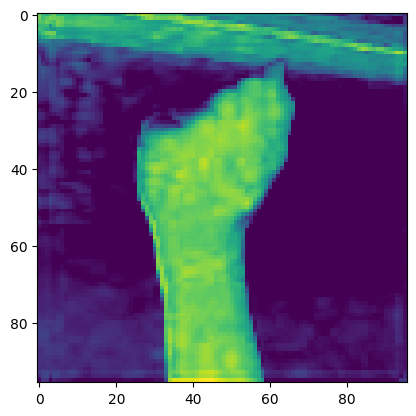

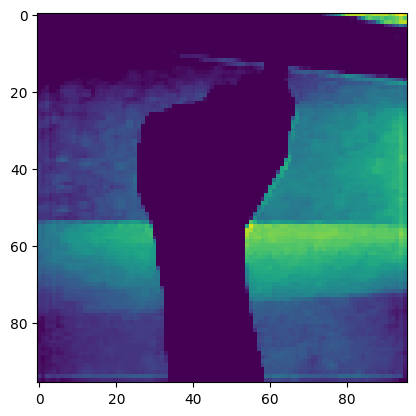

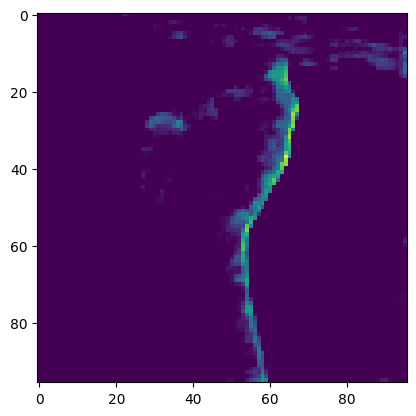

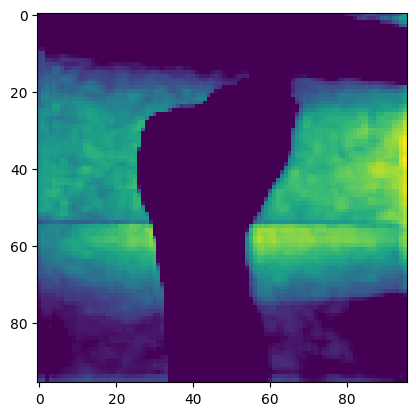

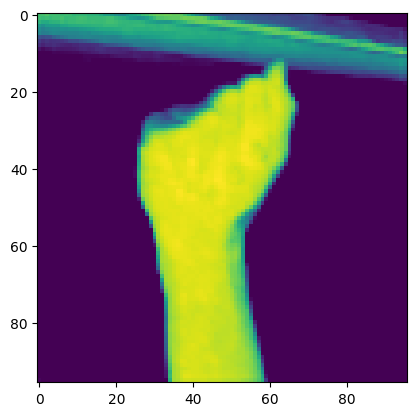

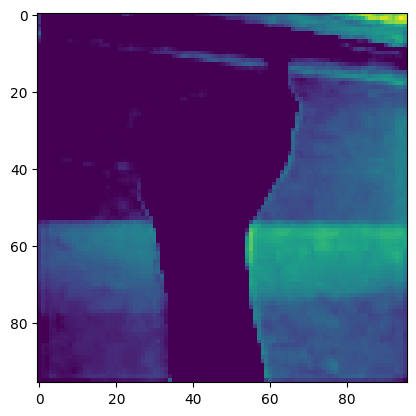

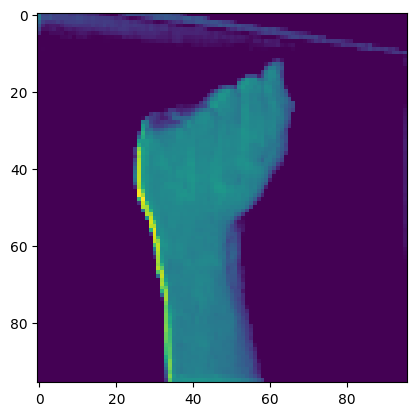

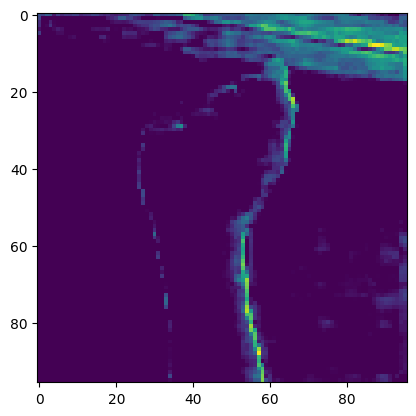

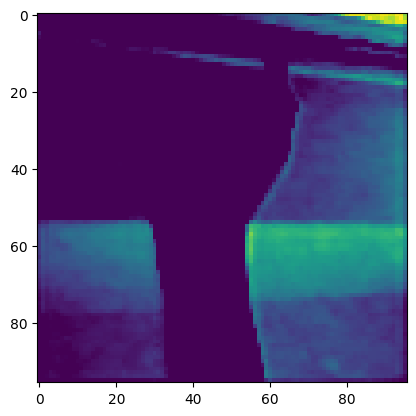

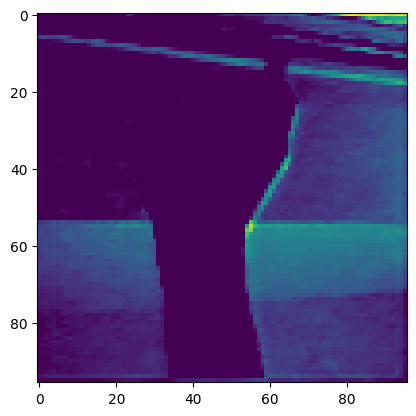

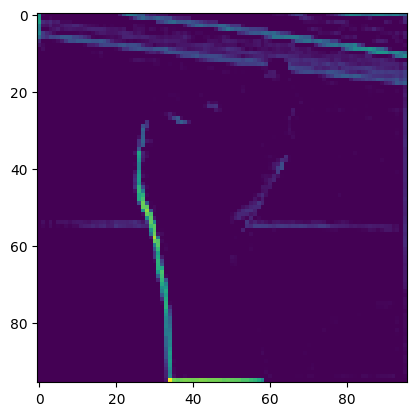

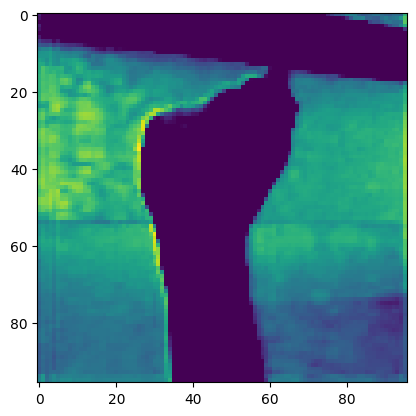

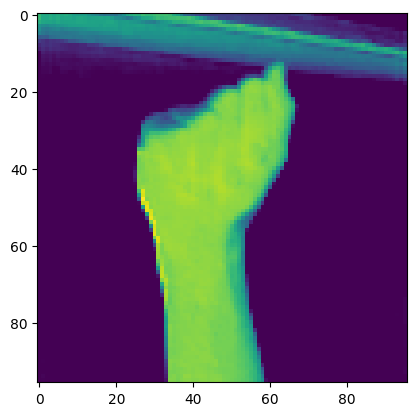

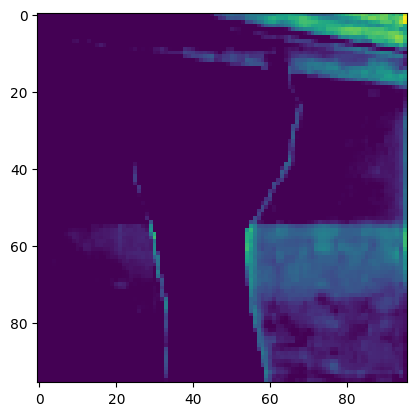

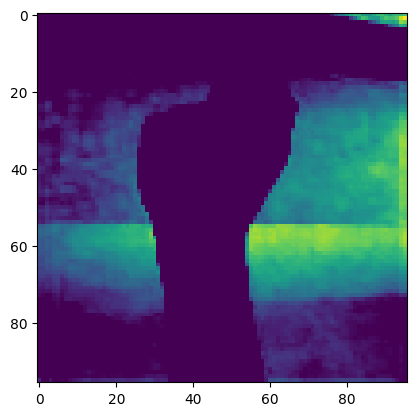

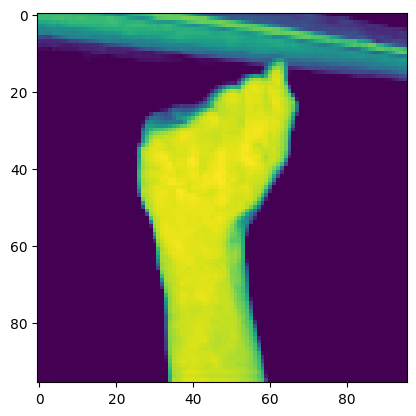

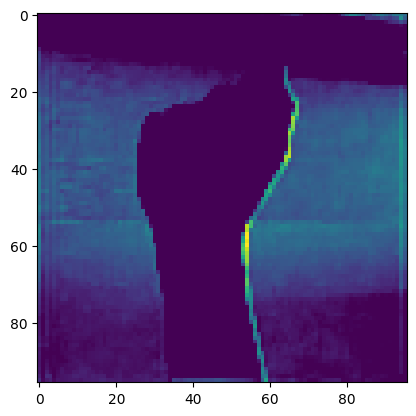

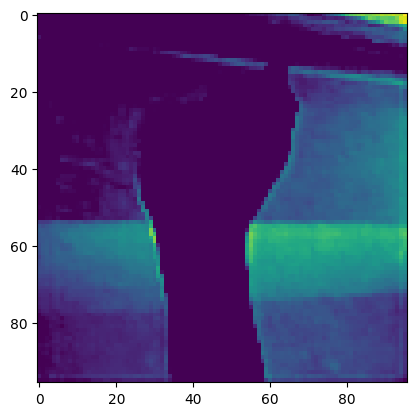

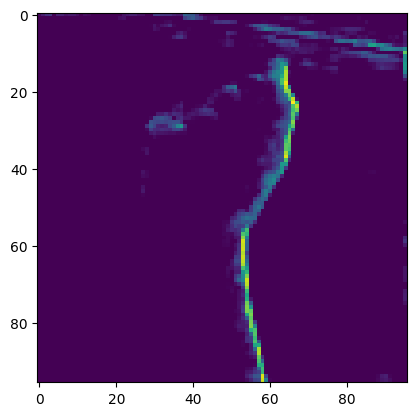

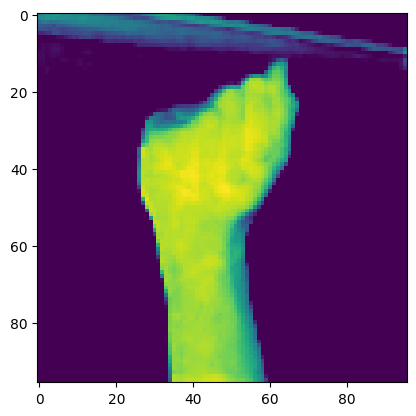

In [6]:
c1 = model.pool(torch.relu(model.conv1(img))).detach().numpy()
print(c1.shape)

for conv in c1:
    plt.figure()
    plt.imshow(conv)

plt.show()

C:\Users\David\AppData\Local\Temp\ipykernel_26256\4074596178.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


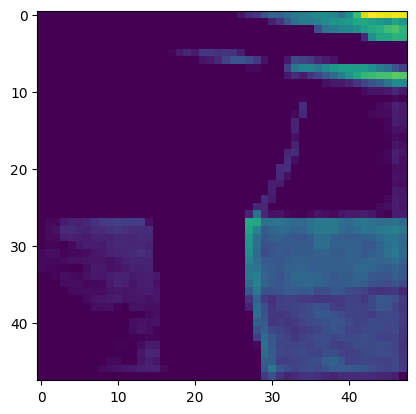

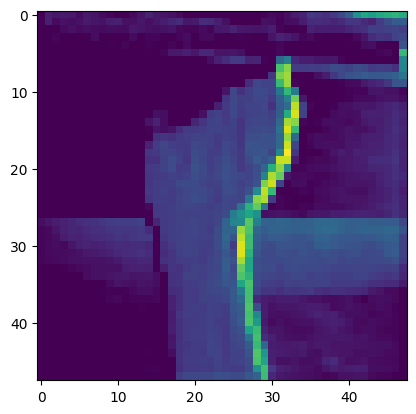

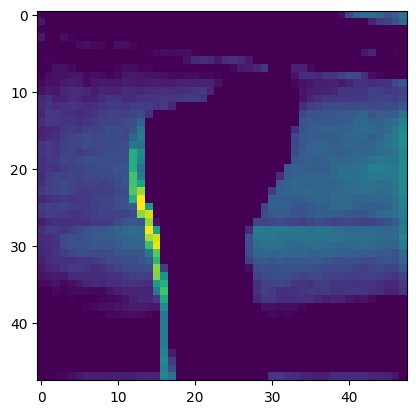

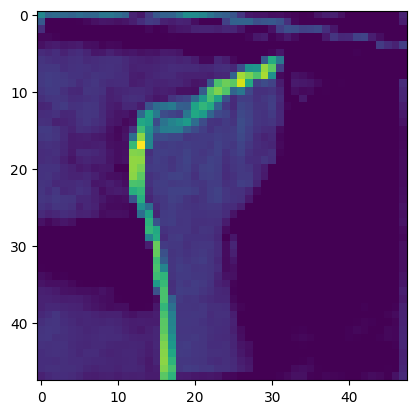

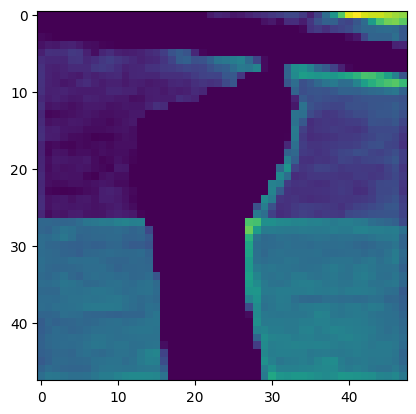

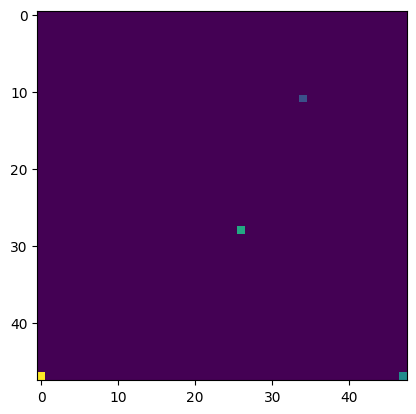

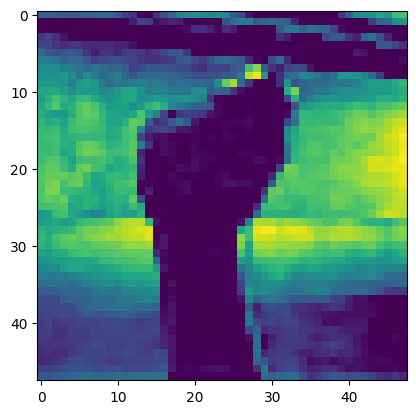

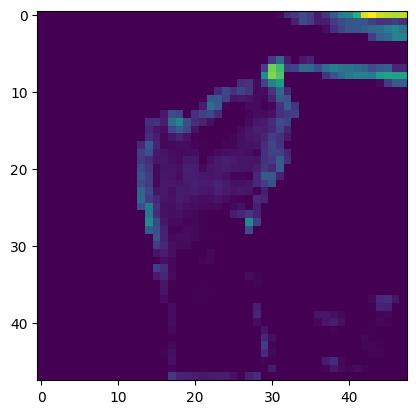

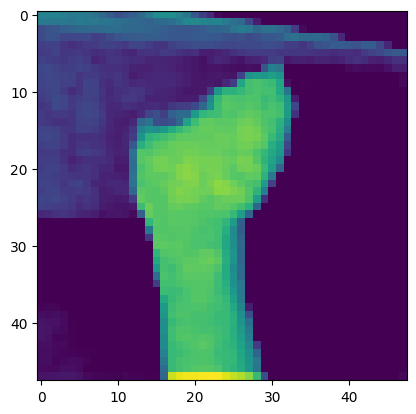

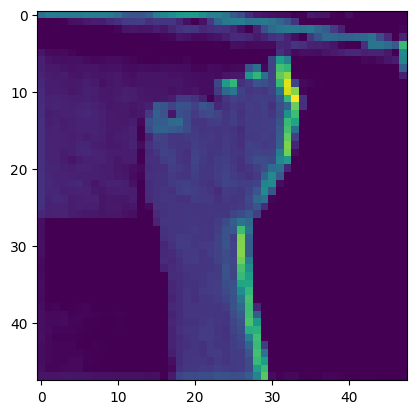

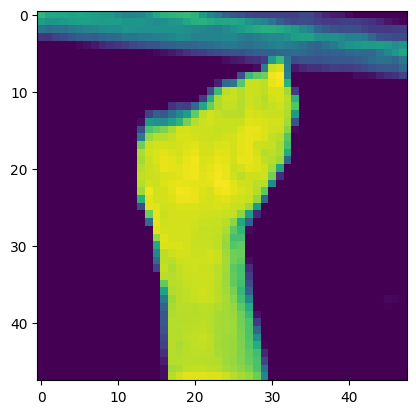

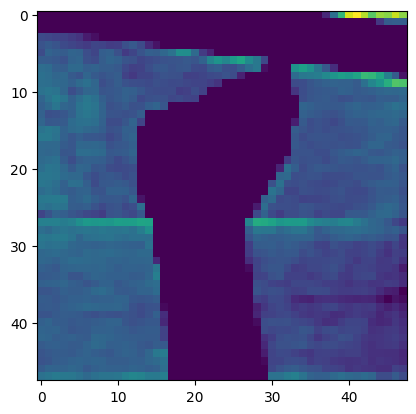

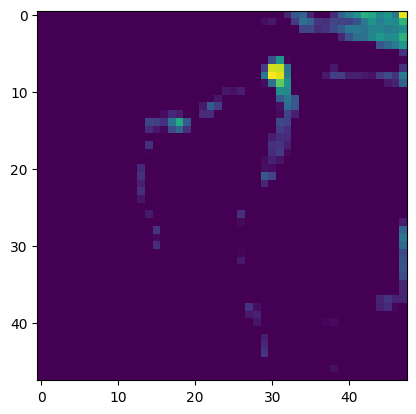

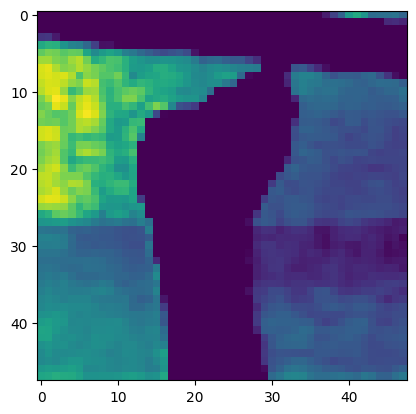

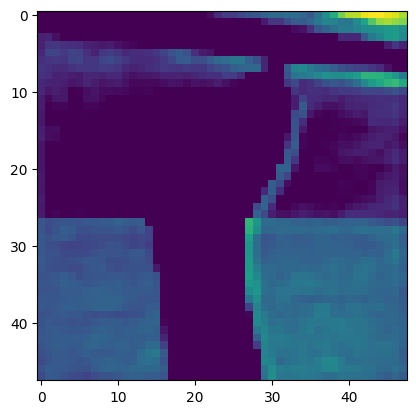

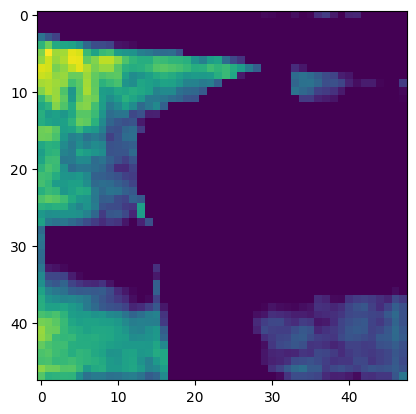

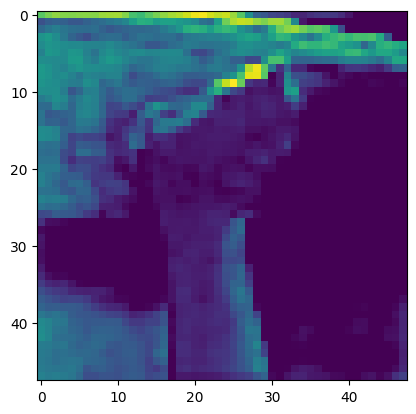

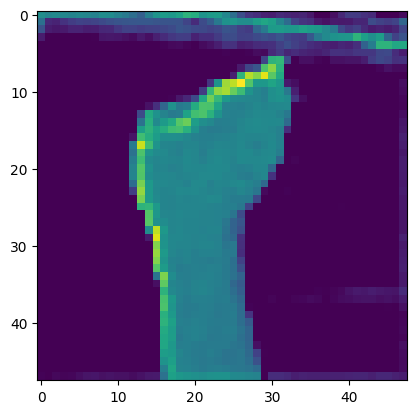

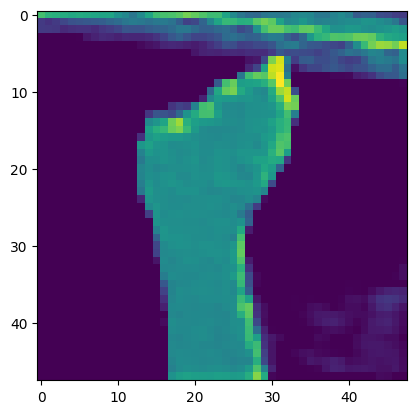

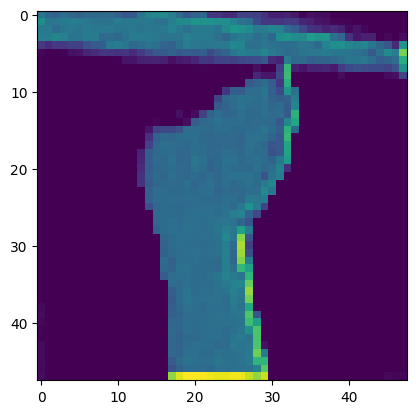

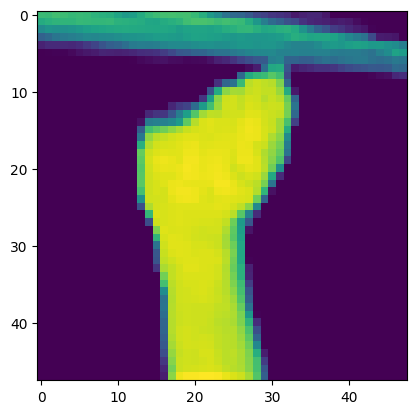

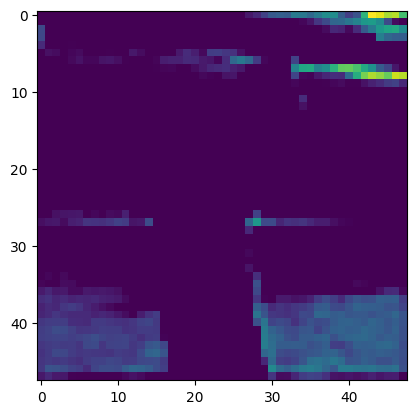

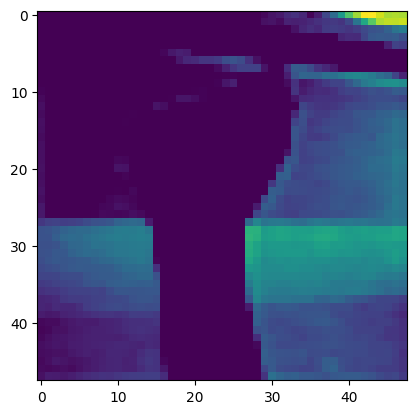

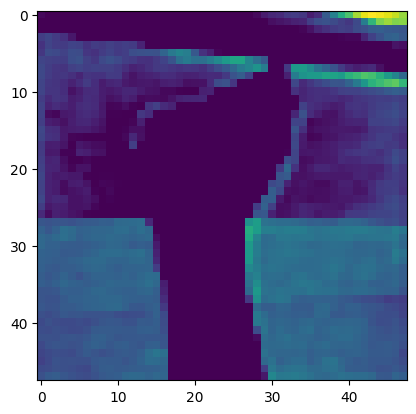

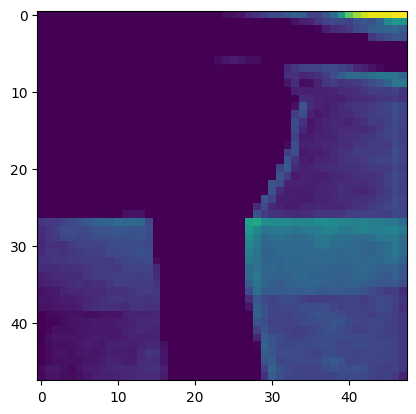

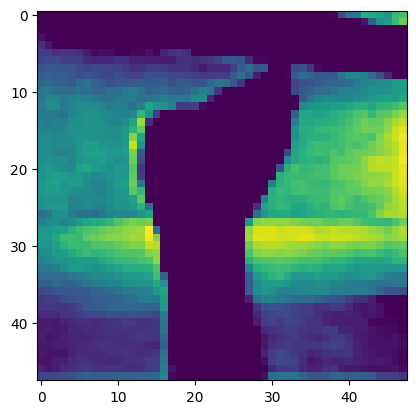

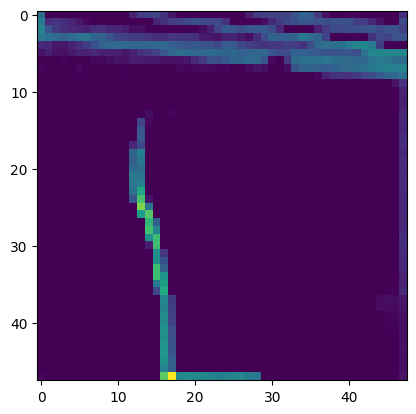

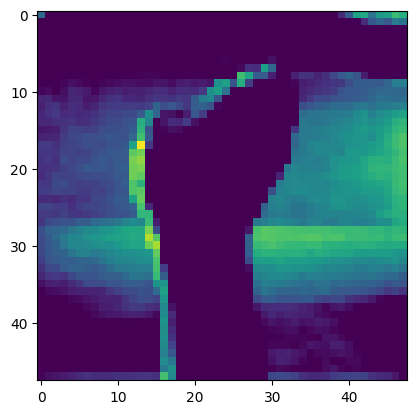

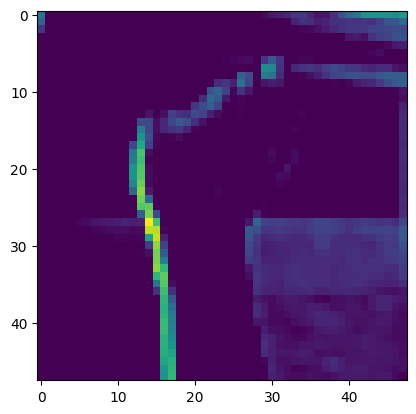

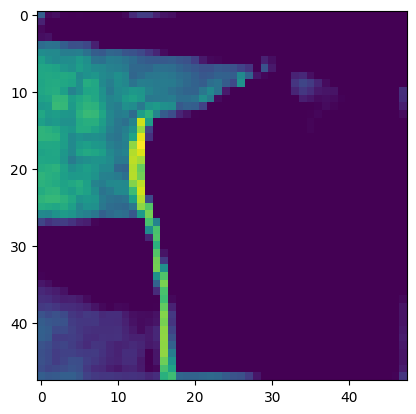

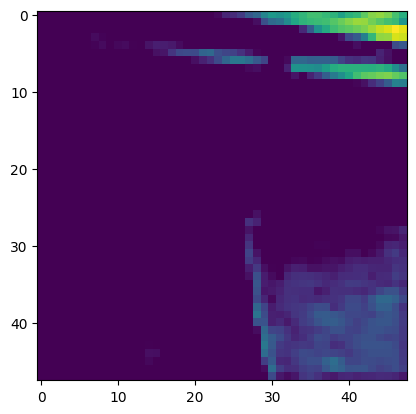

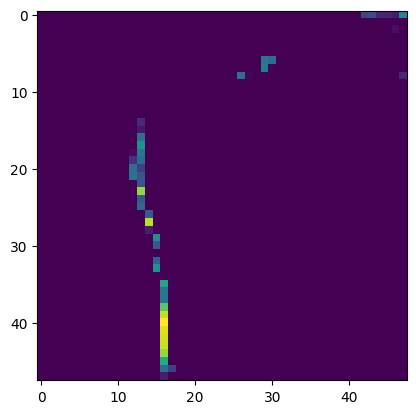

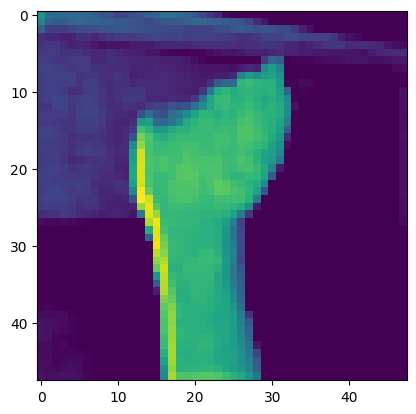

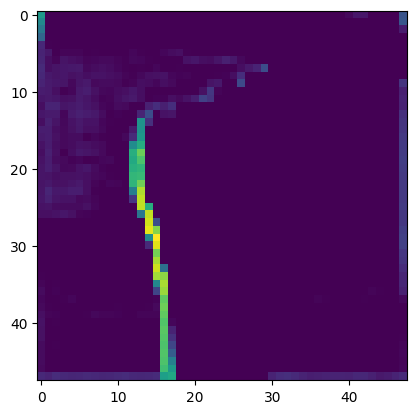

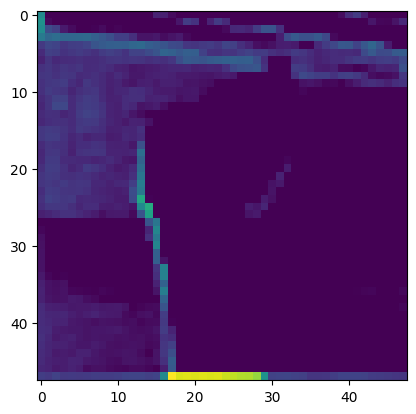

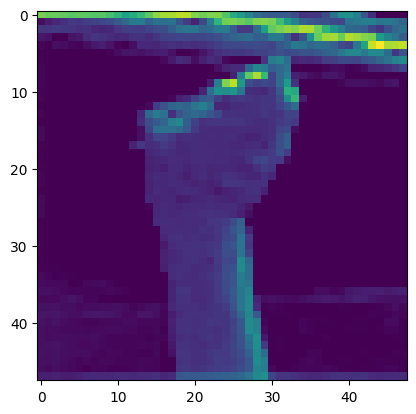

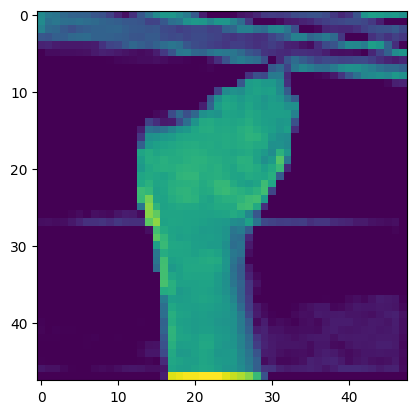

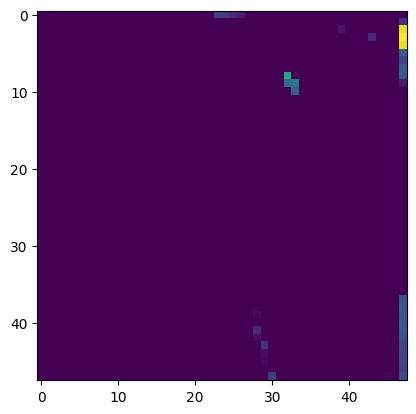

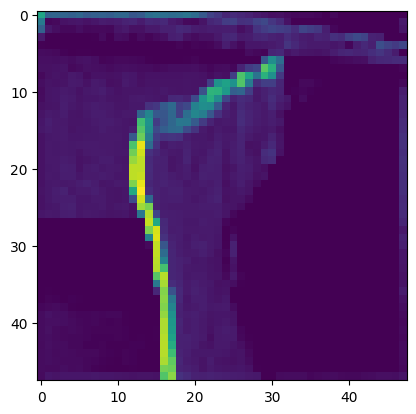

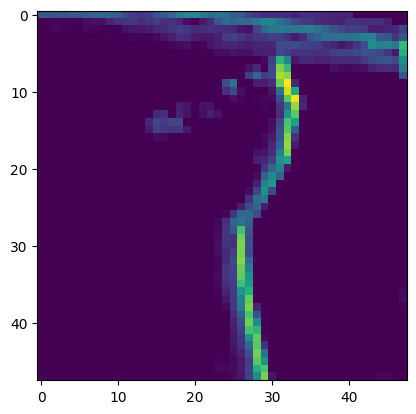

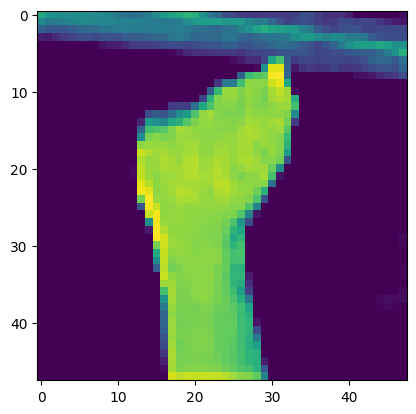

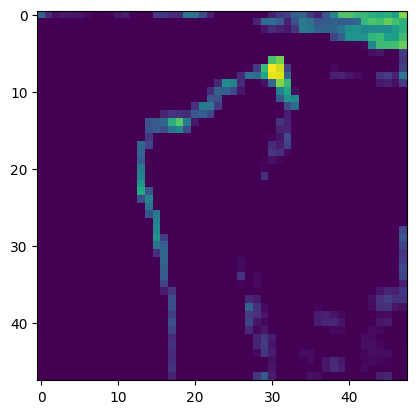

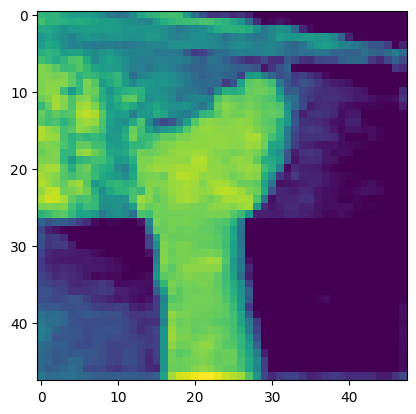

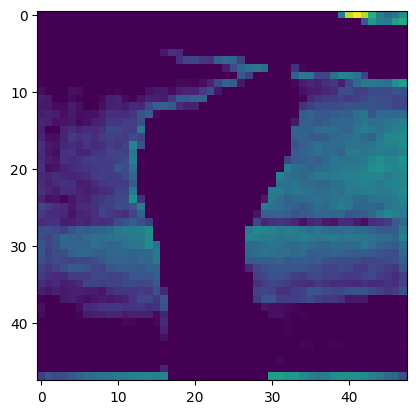

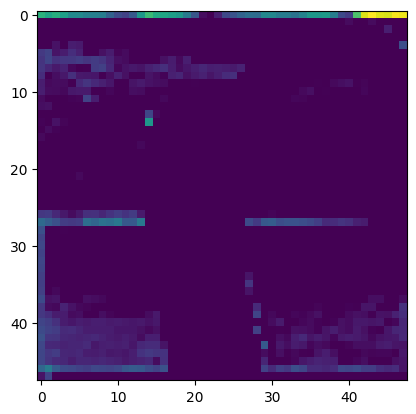

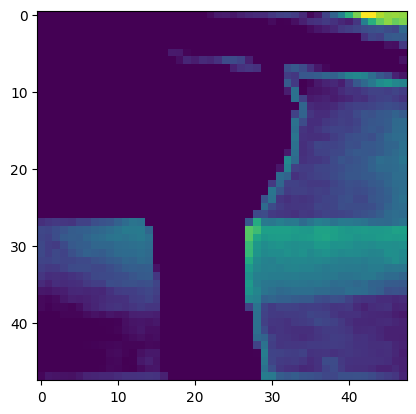

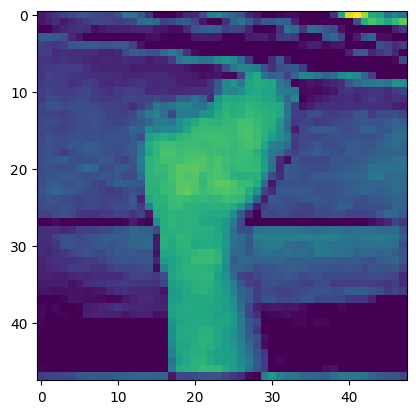

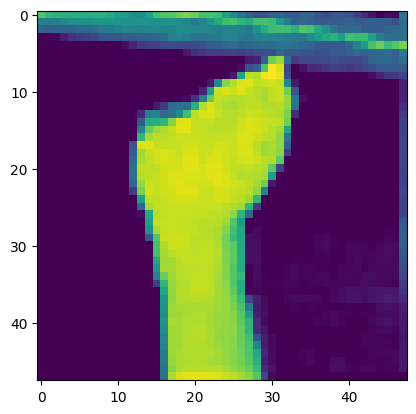

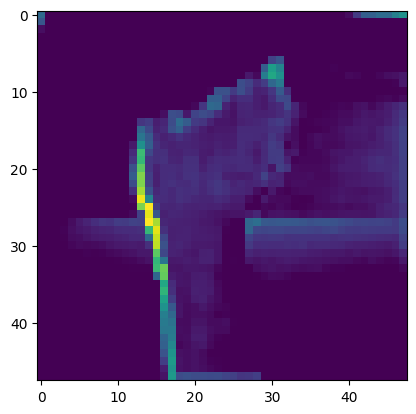

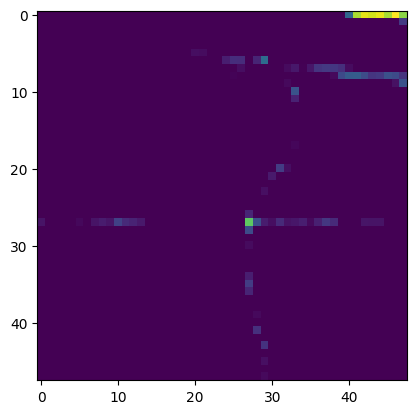

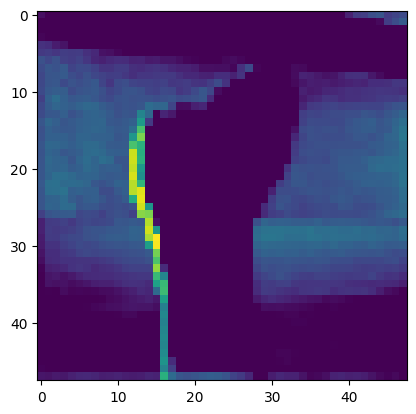

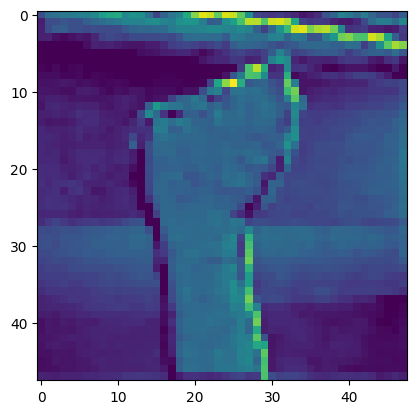

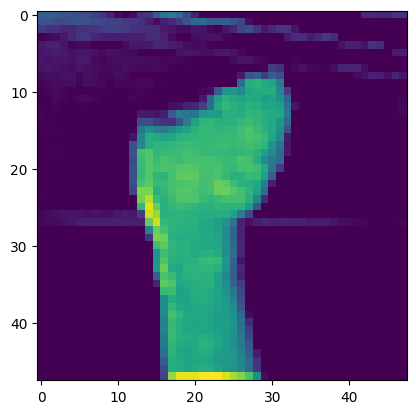

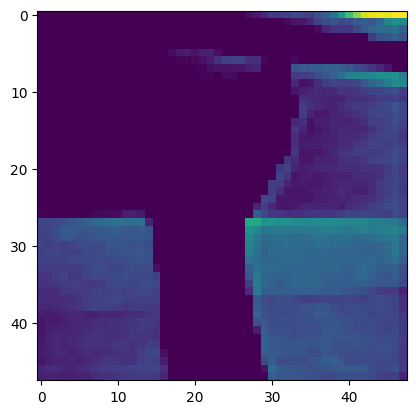

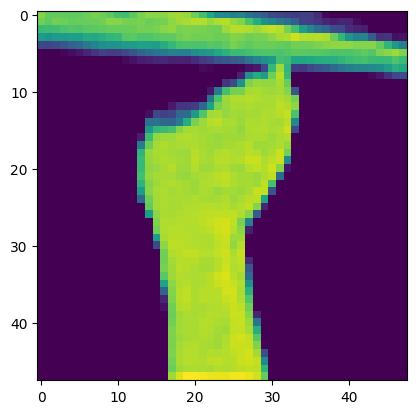

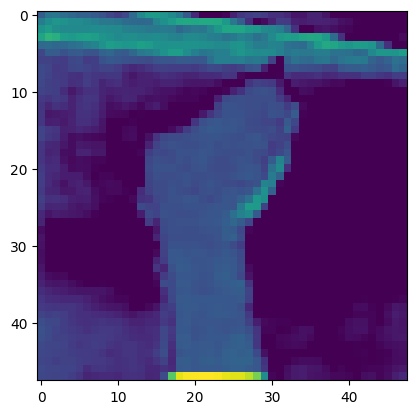

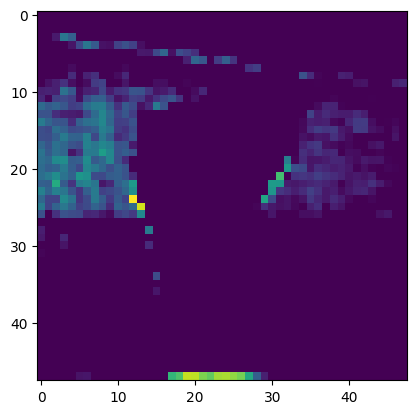

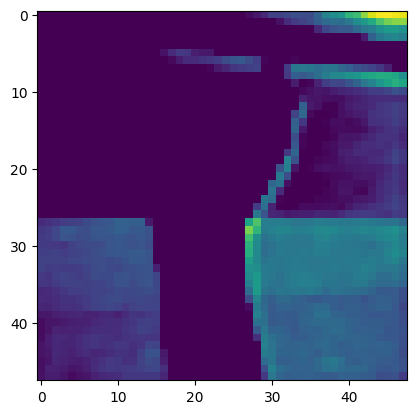

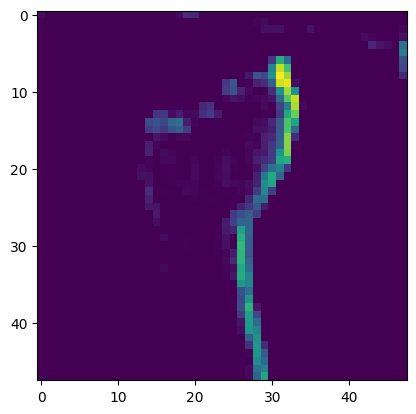

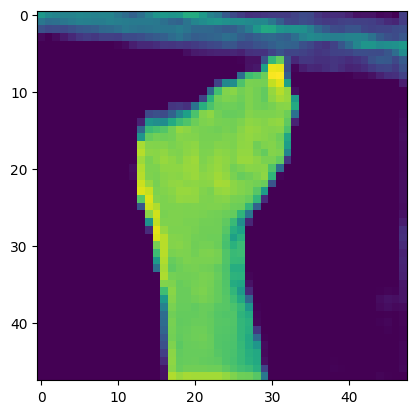

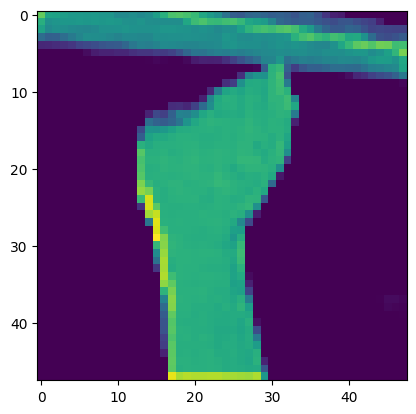

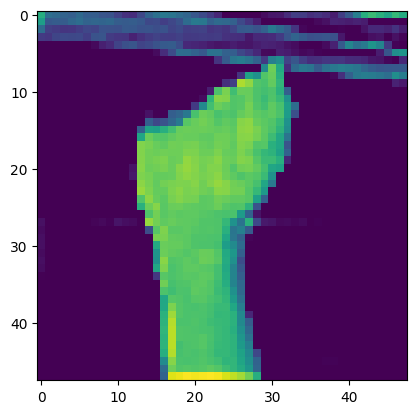

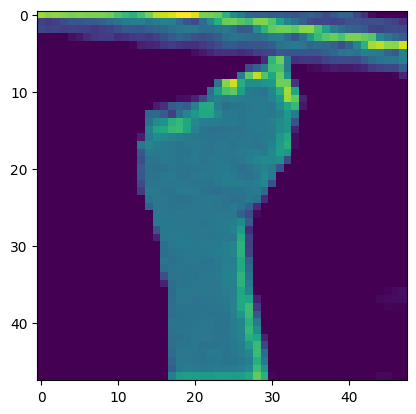

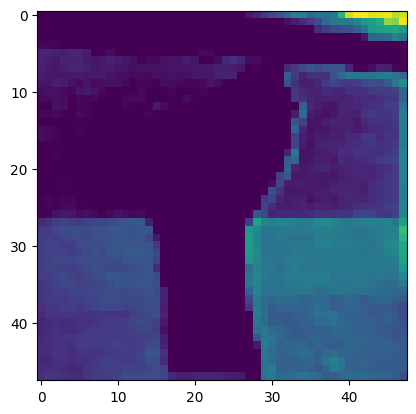

In [7]:
c2 = model.pool(torch.relu(model.conv2(model.pool(torch.relu(model.conv1(img)))))).detach().numpy()

for conv in c2:
    plt.figure()
    plt.imshow(conv)
plt.show()


C:\Users\David\AppData\Local\Temp\ipykernel_26256\475986439.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


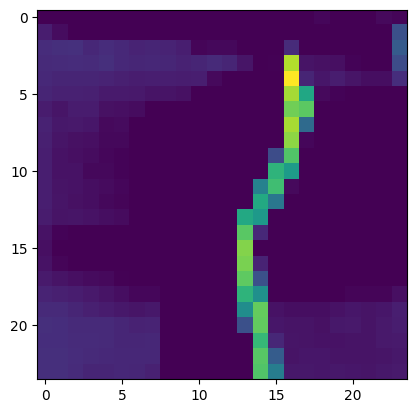

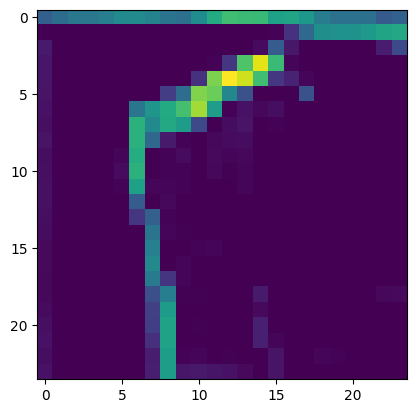

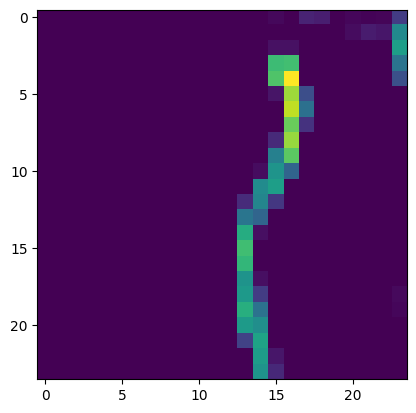

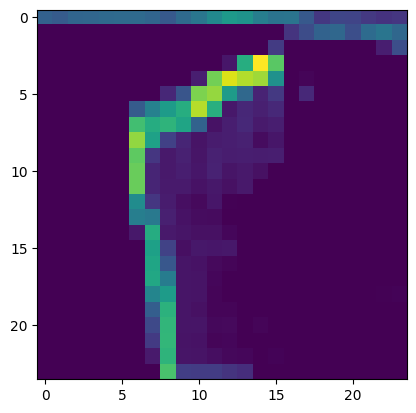

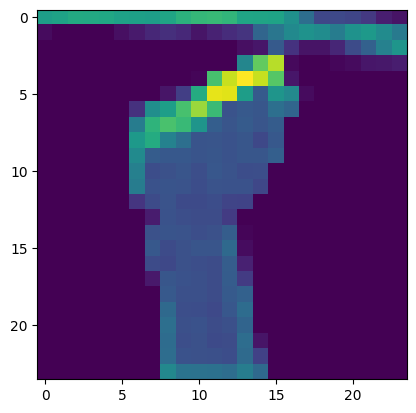

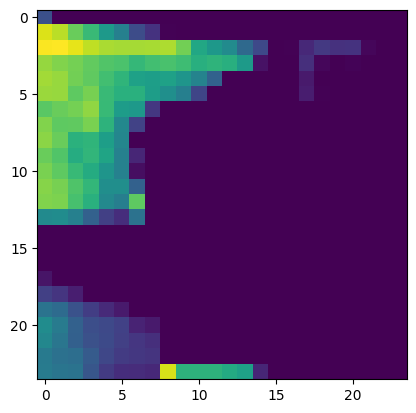

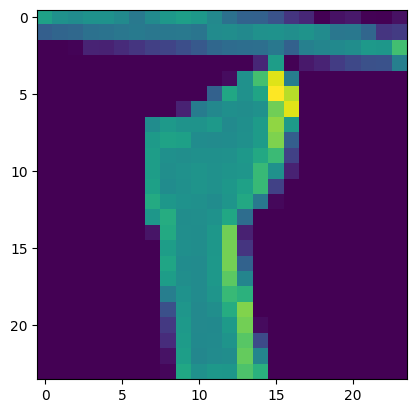

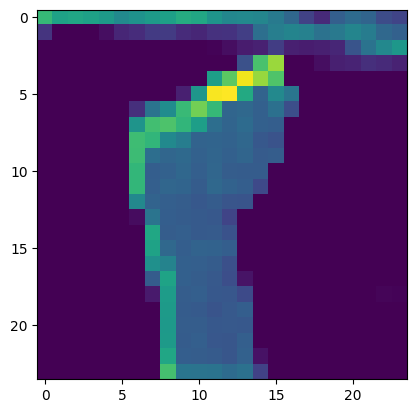

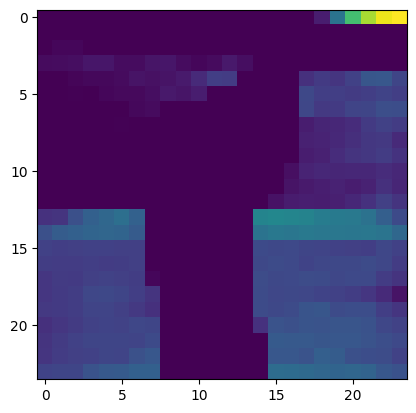

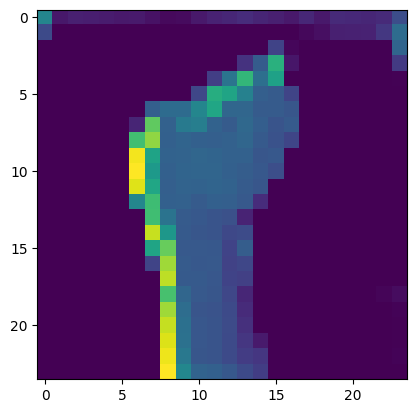

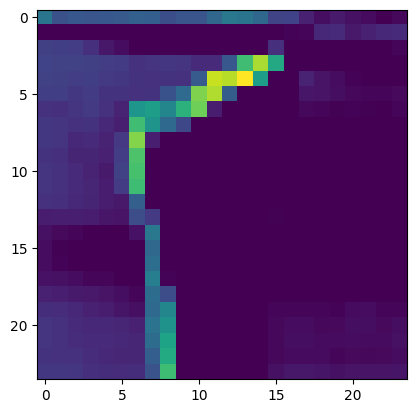

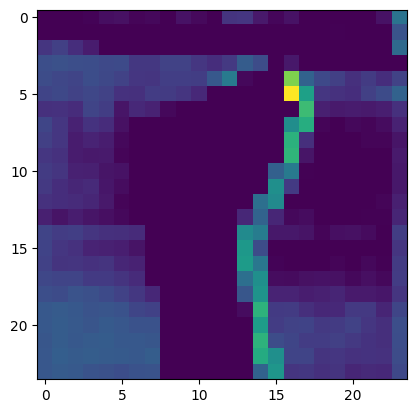

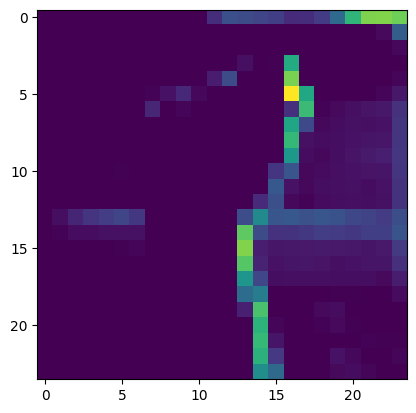

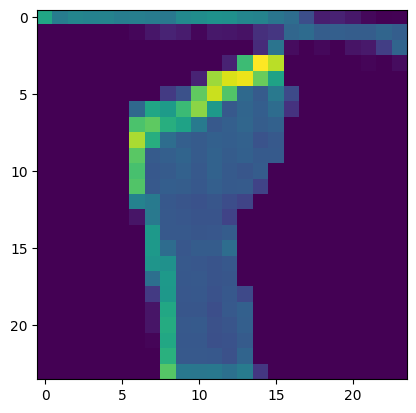

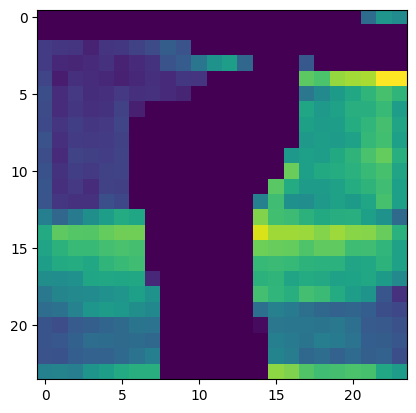

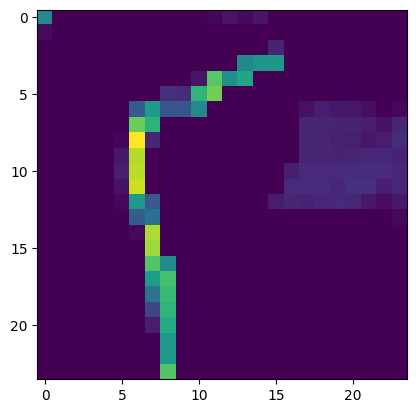

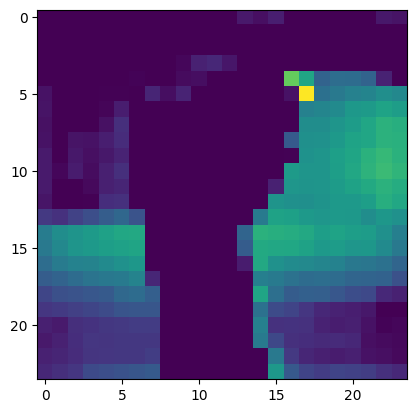

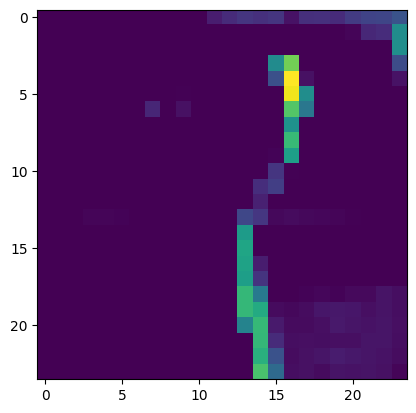

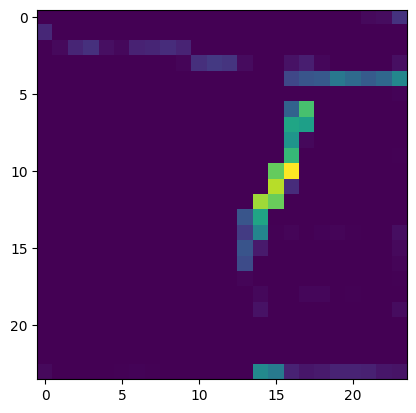

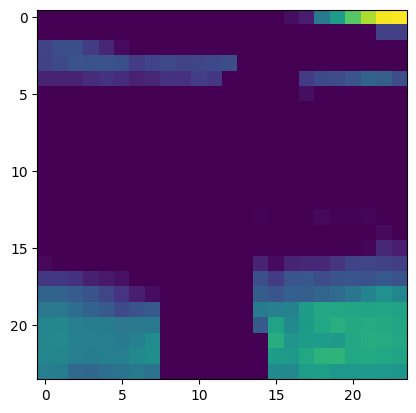

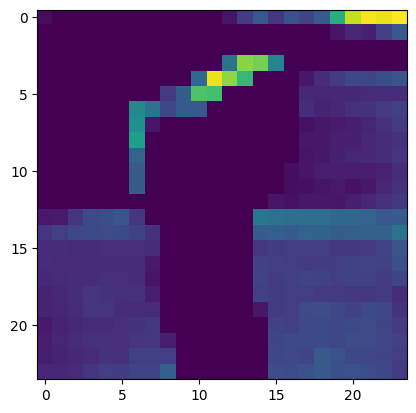

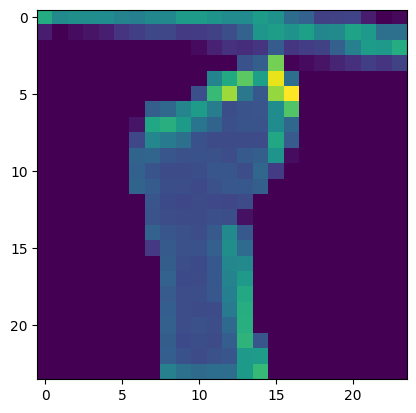

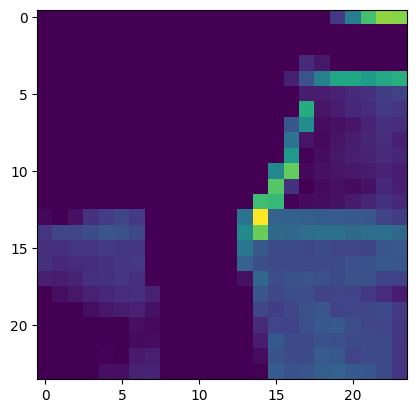

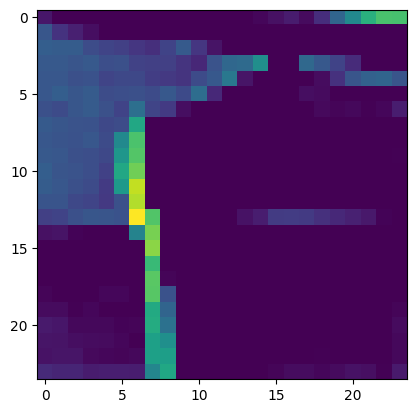

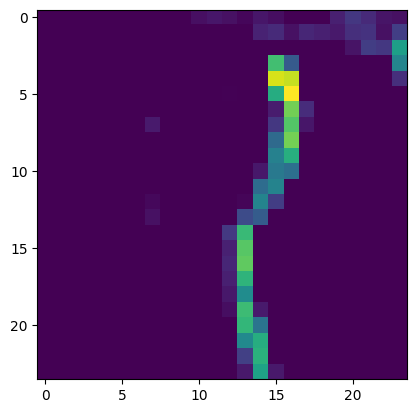

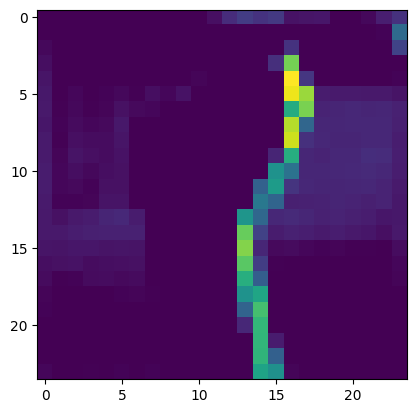

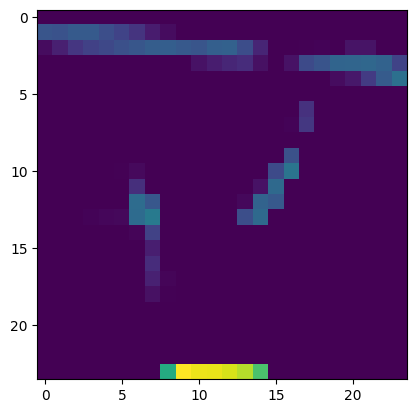

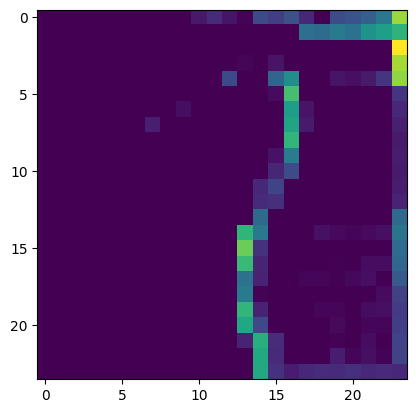

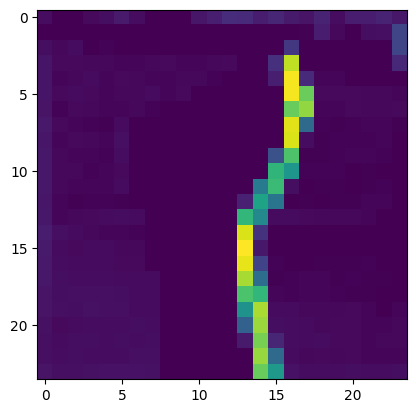

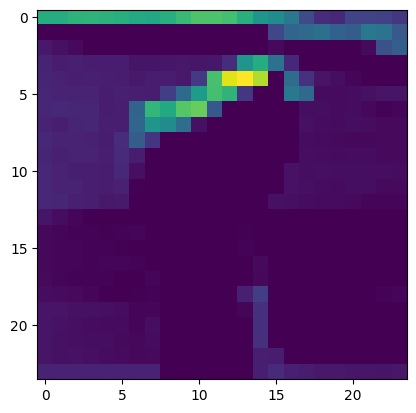

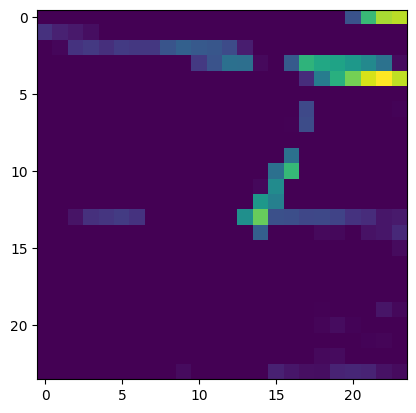

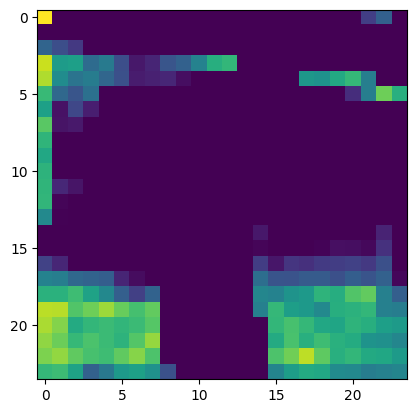

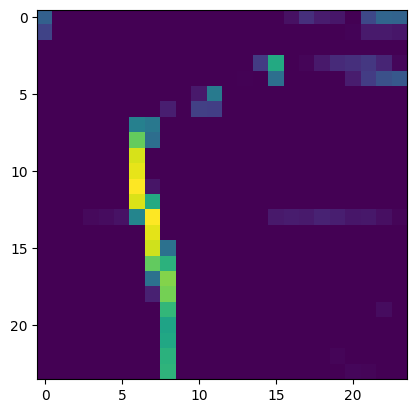

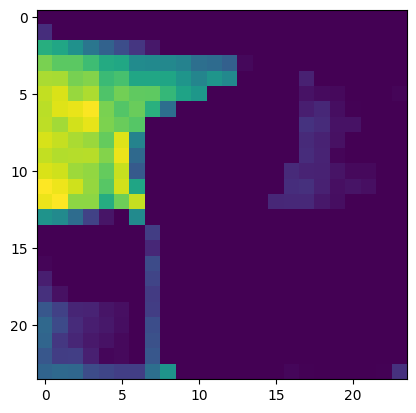

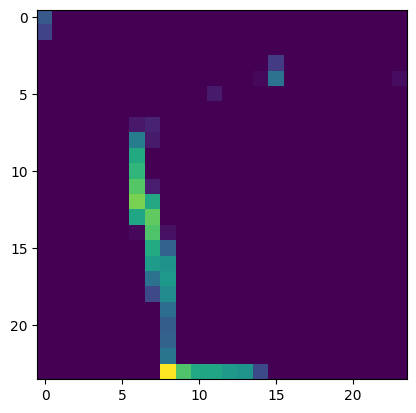

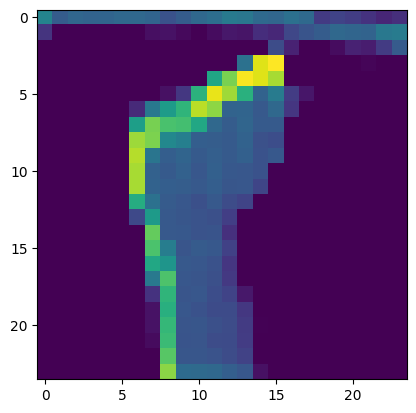

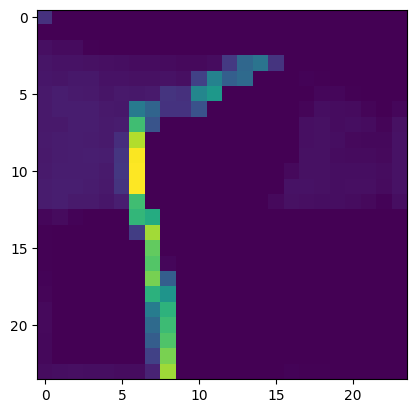

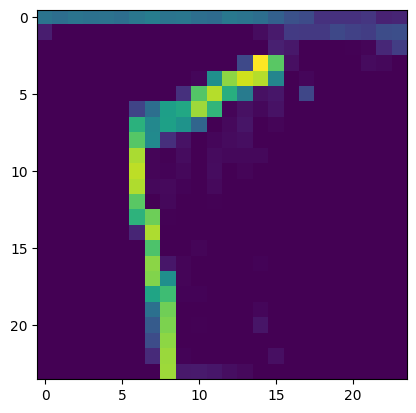

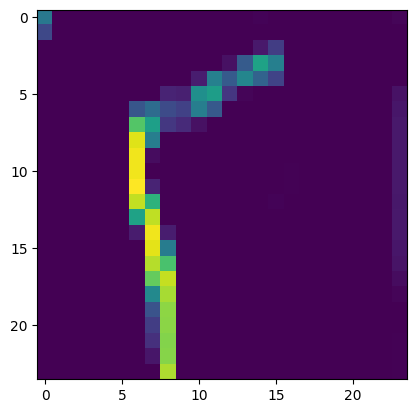

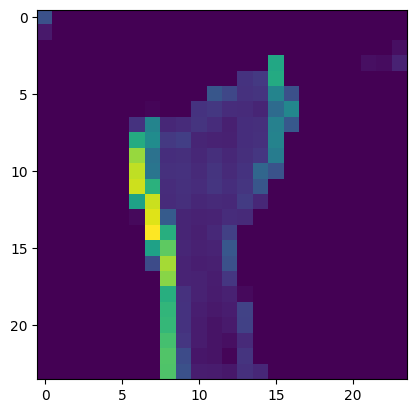

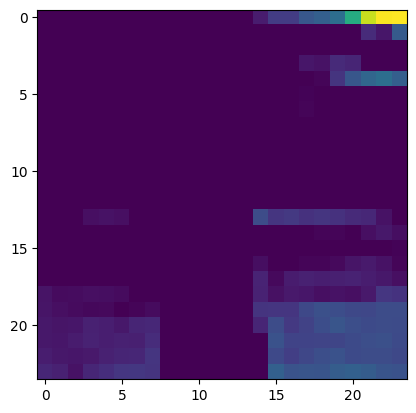

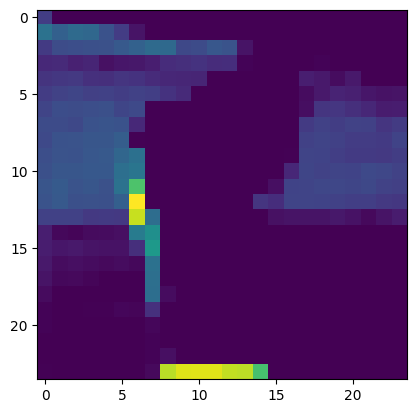

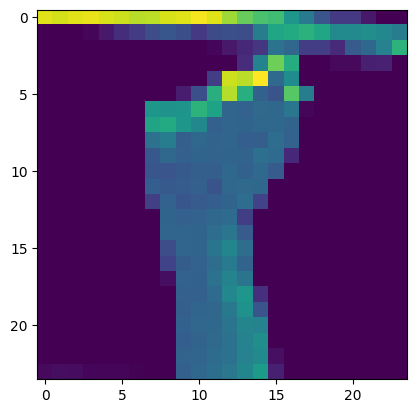

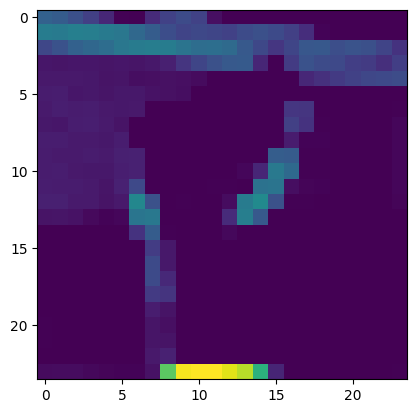

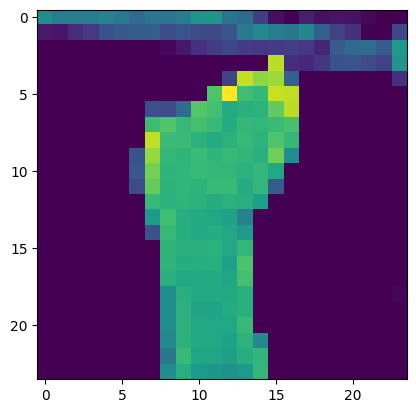

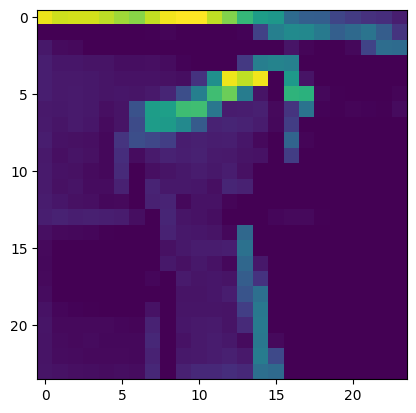

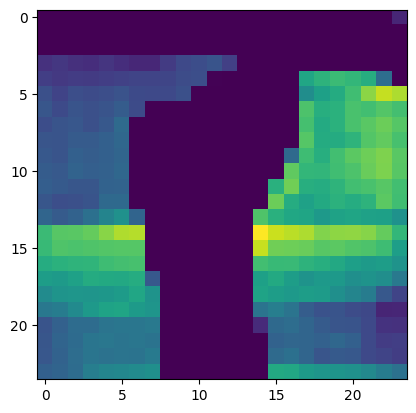

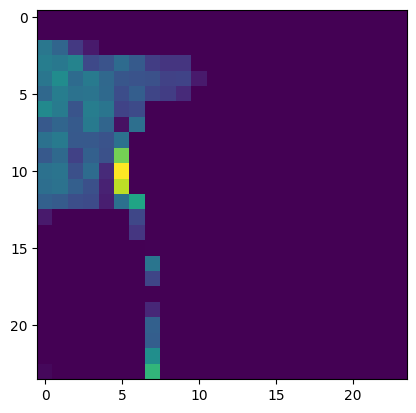

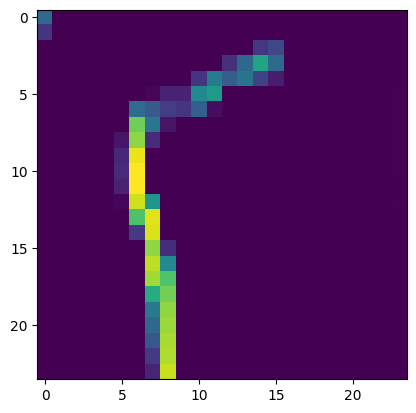

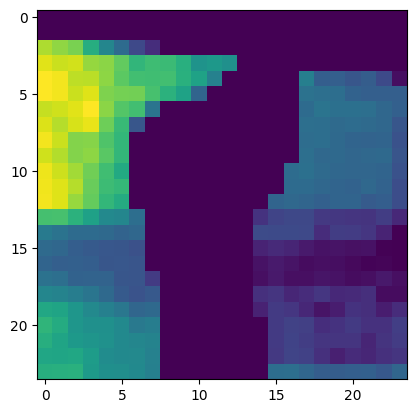

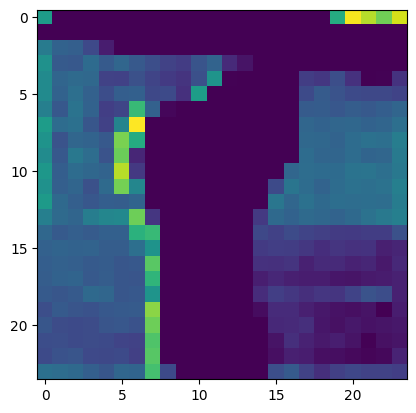

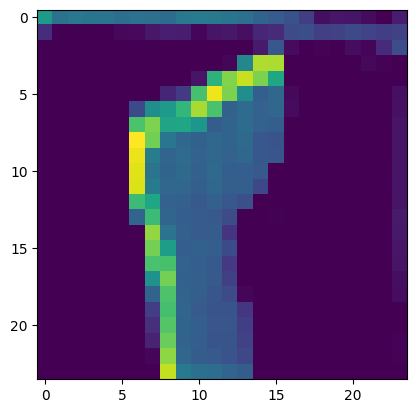

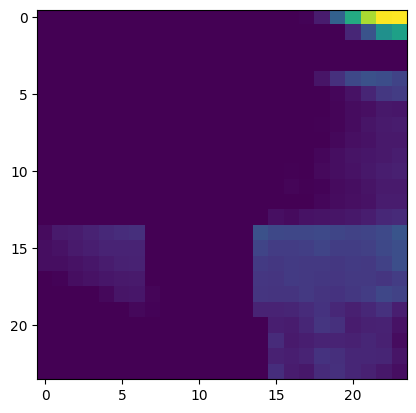

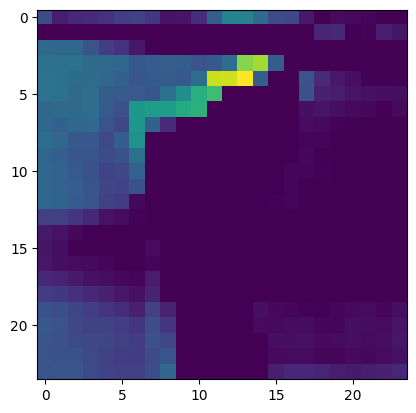

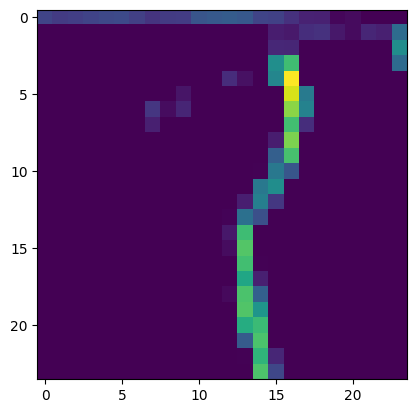

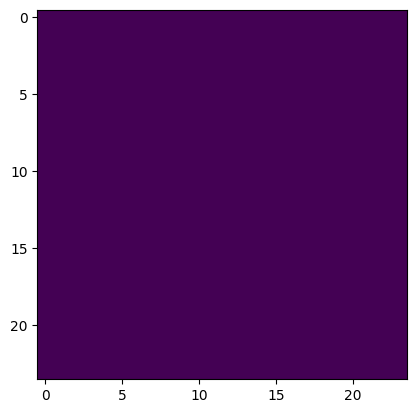

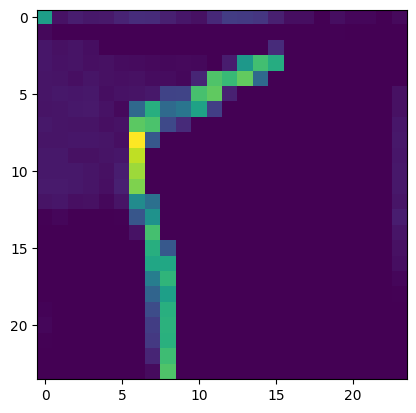

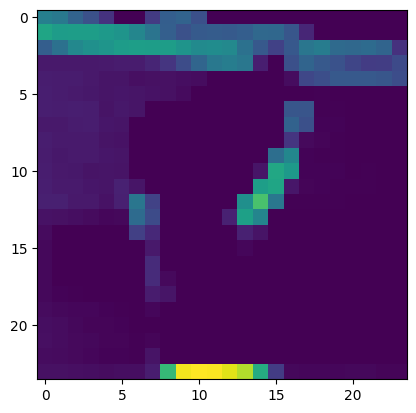

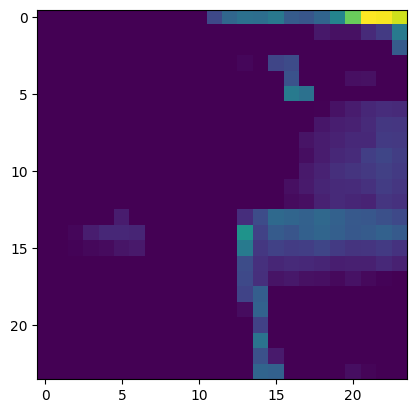

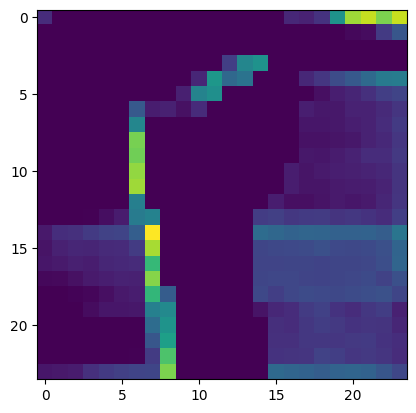

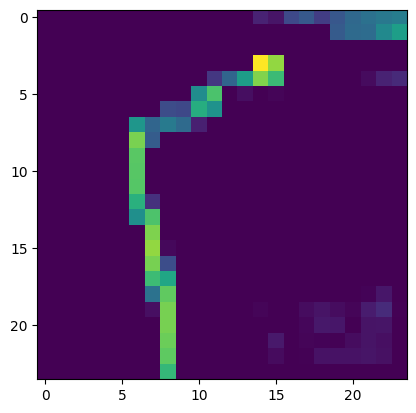

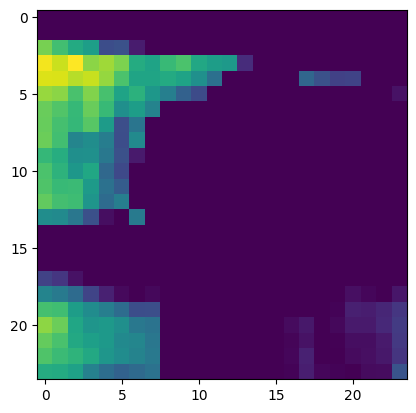

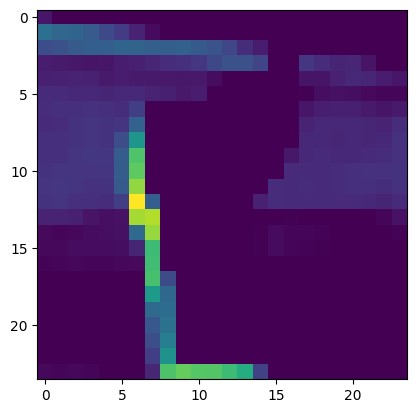

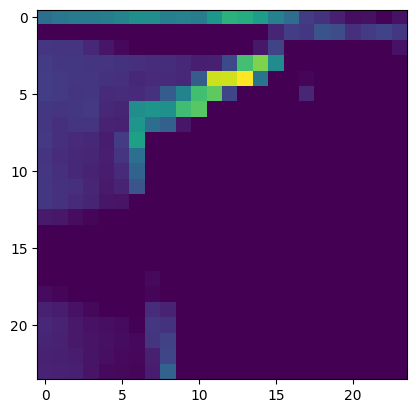

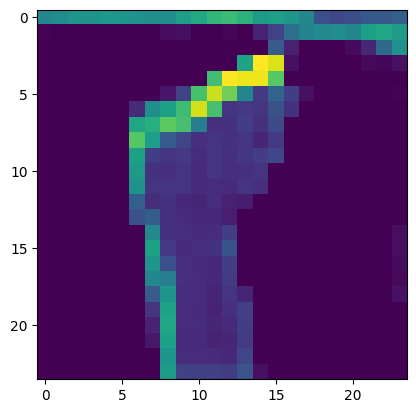

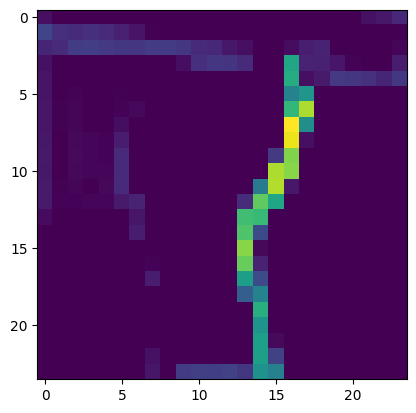

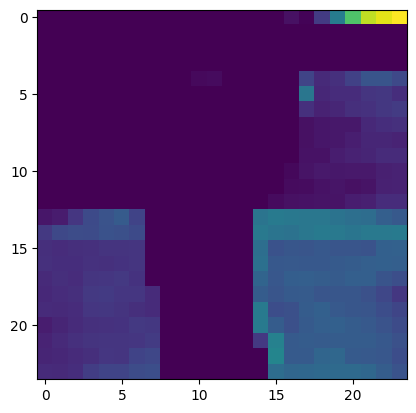

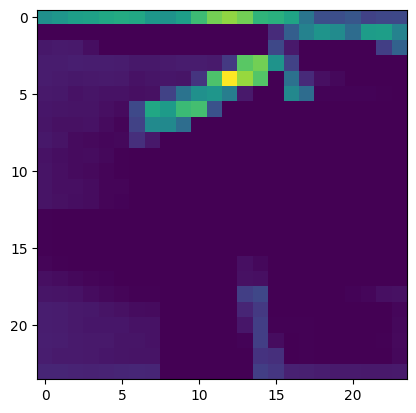

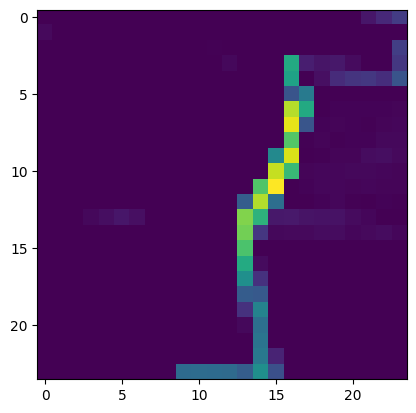

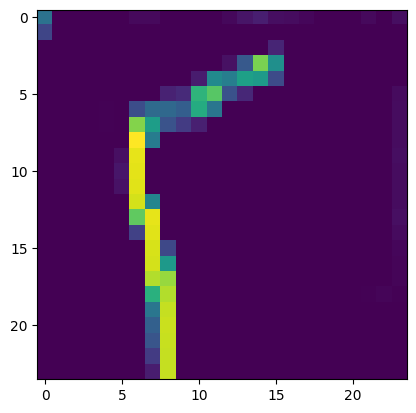

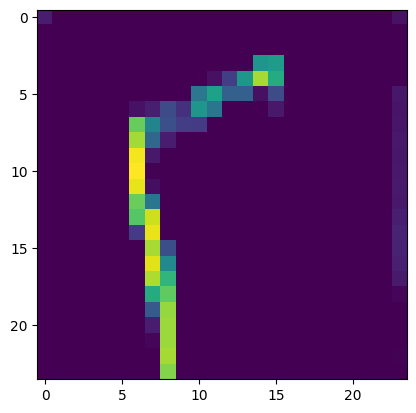

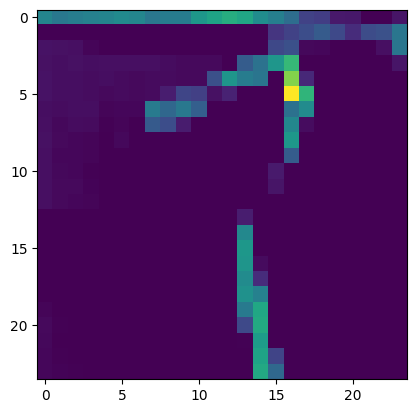

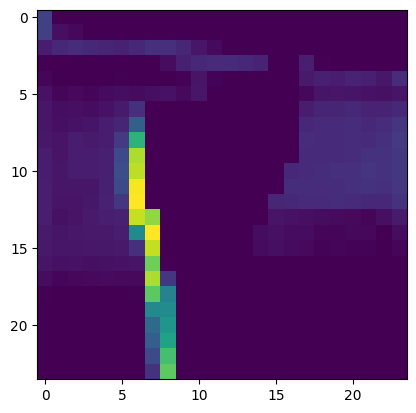

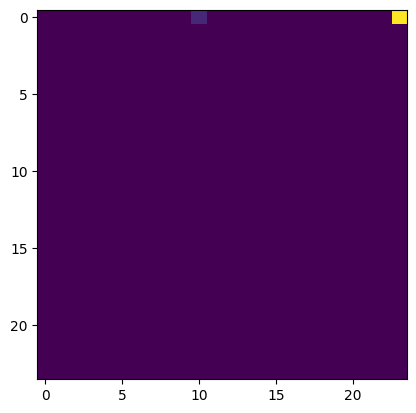

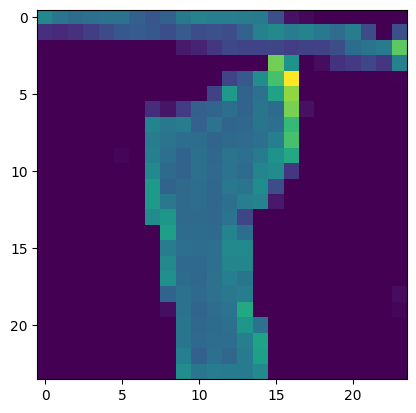

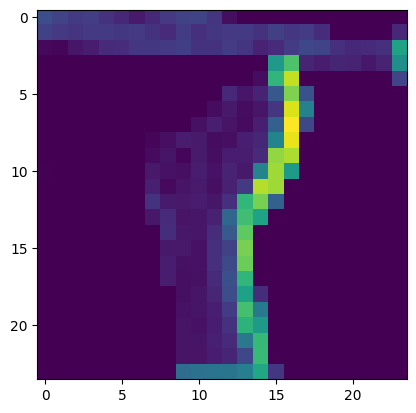

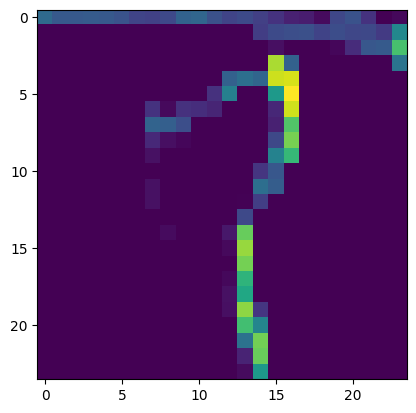

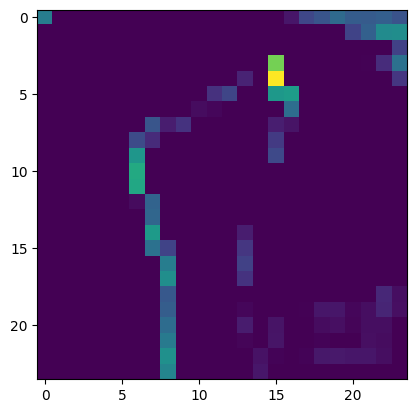

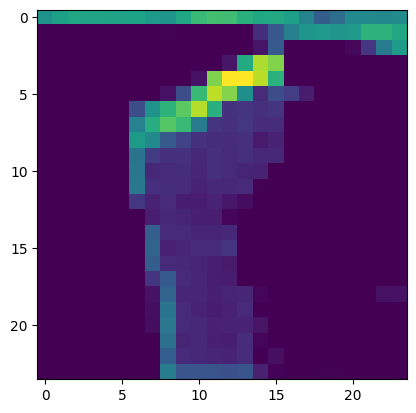

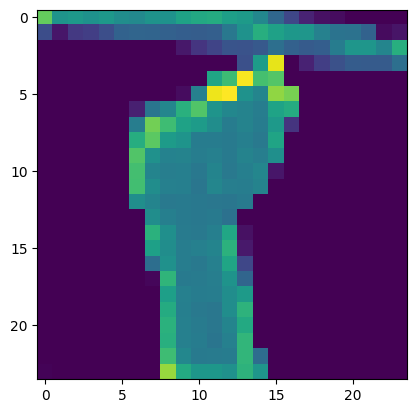

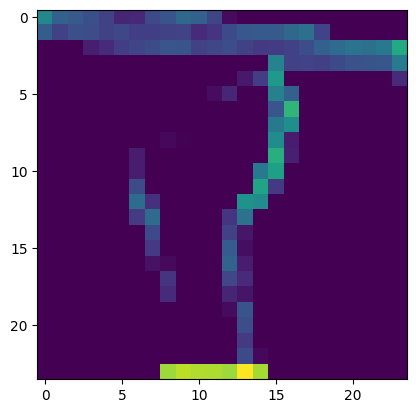

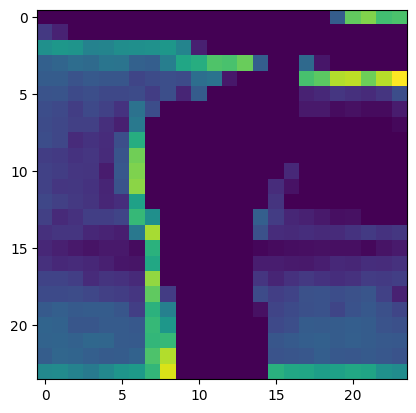

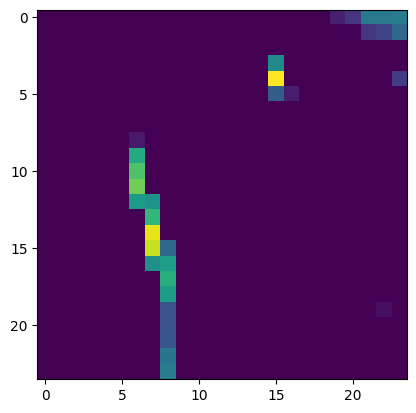

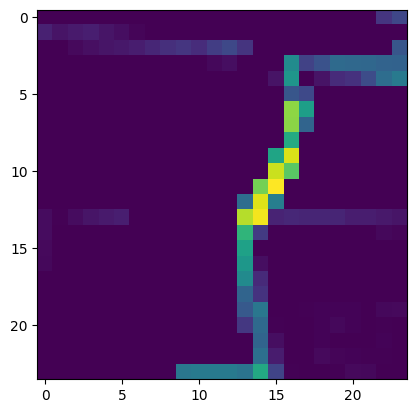

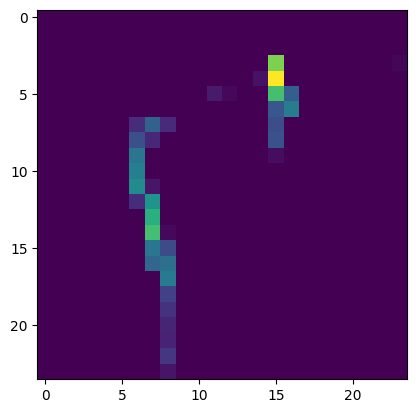

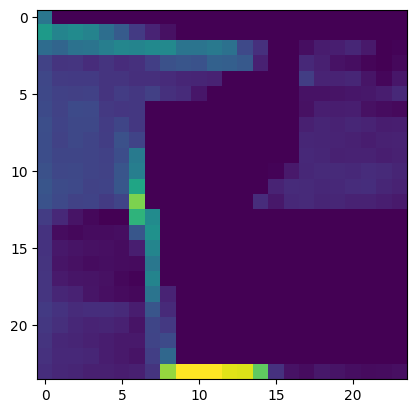

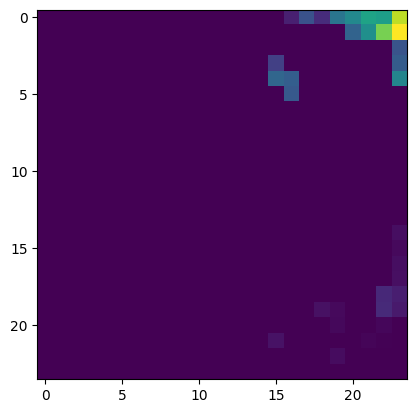

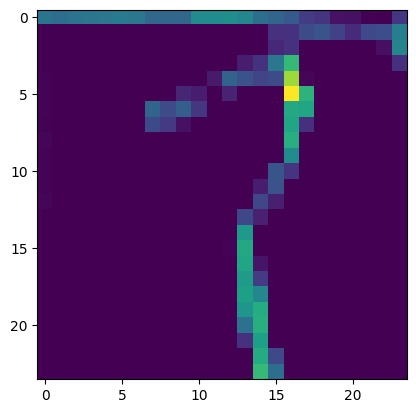

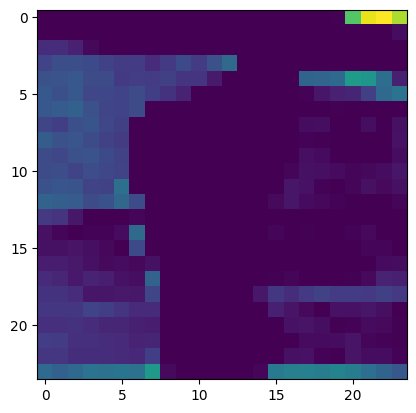

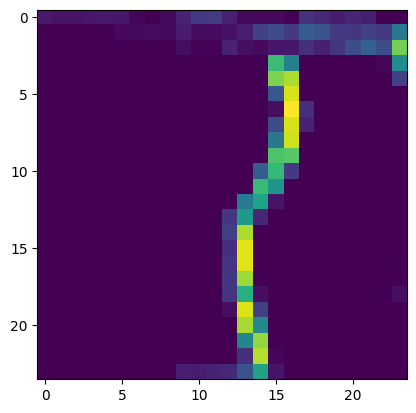

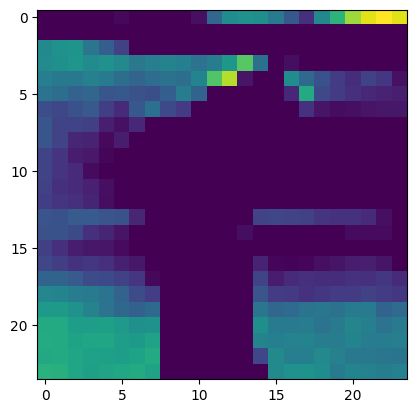

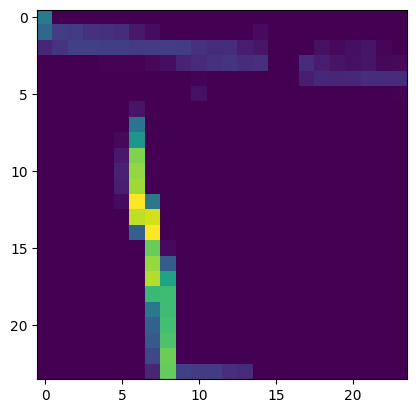

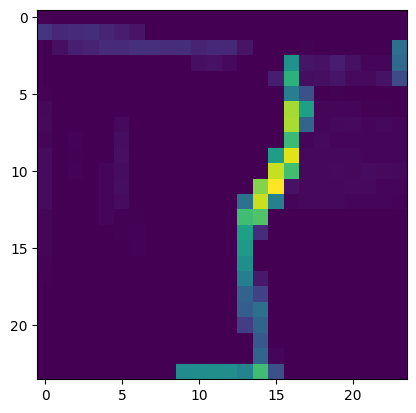

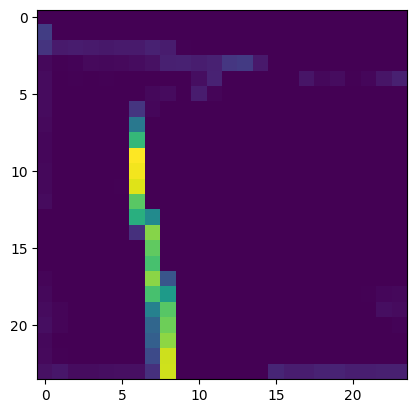

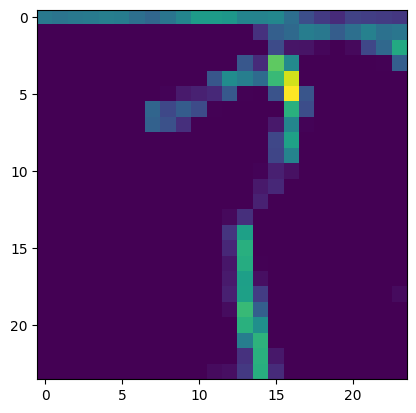

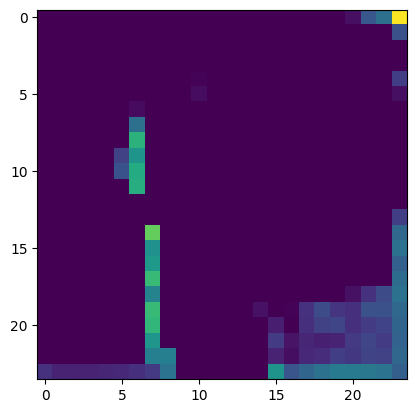

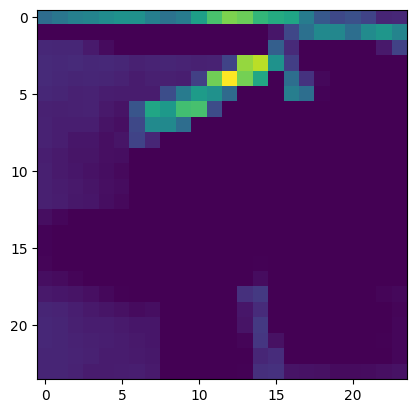

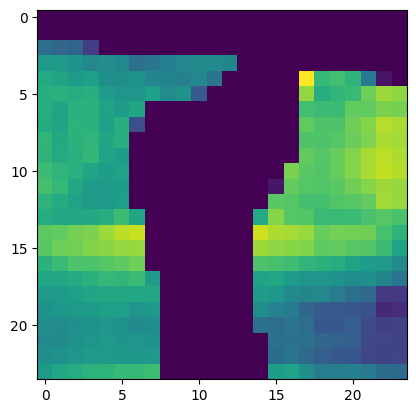

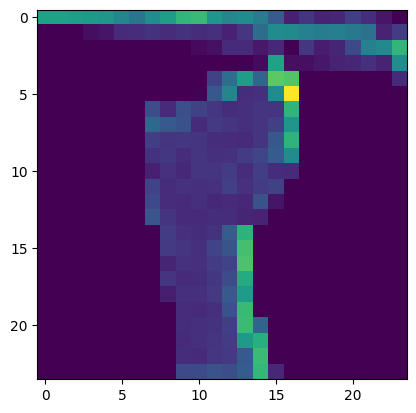

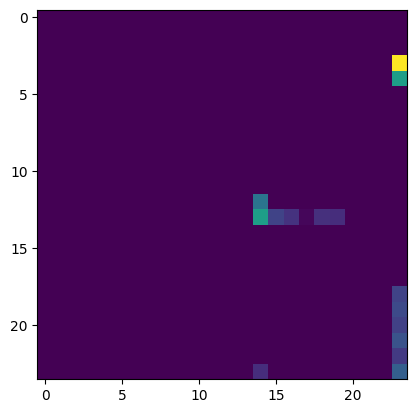

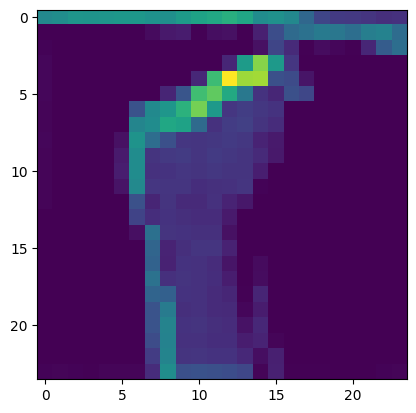

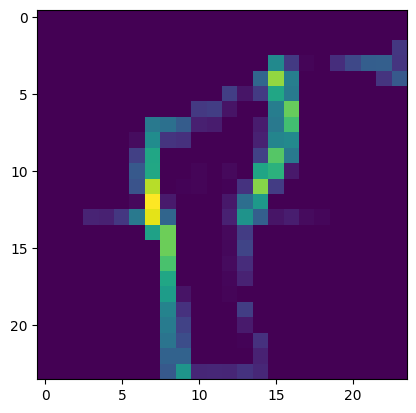

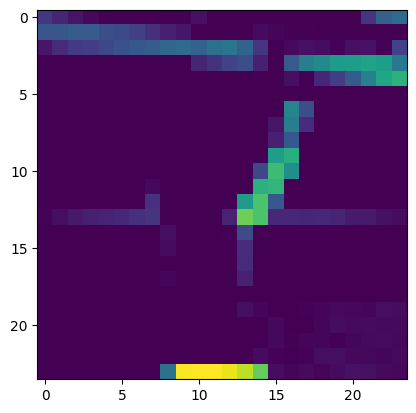

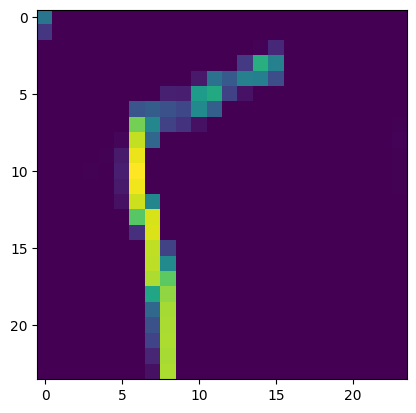

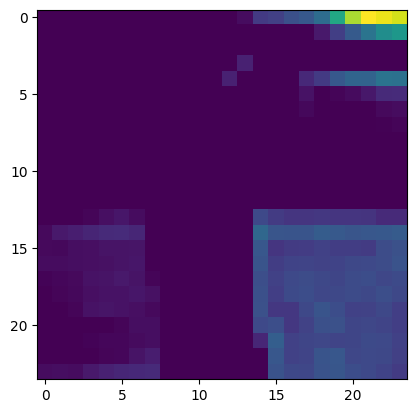

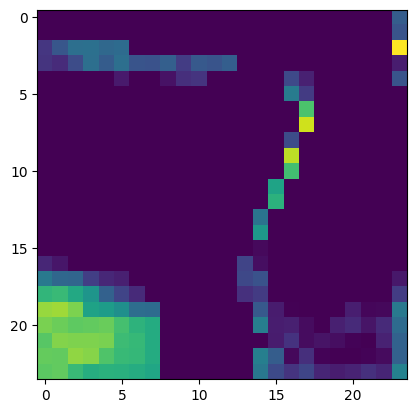

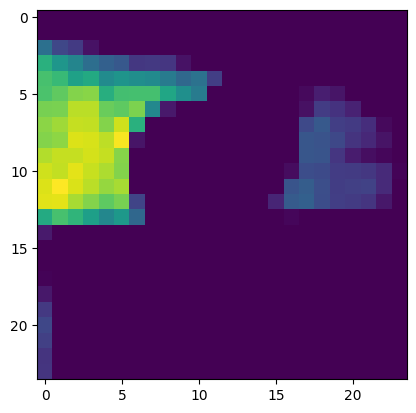

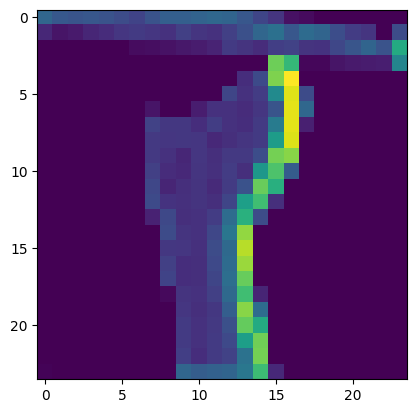

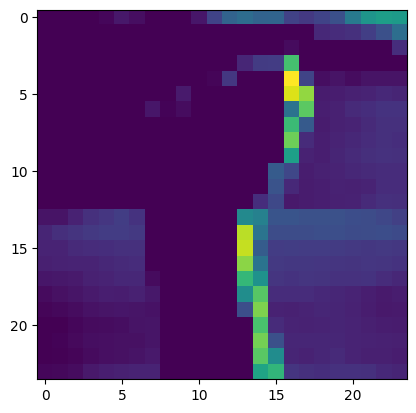

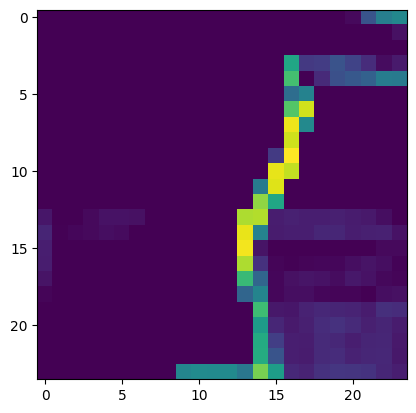

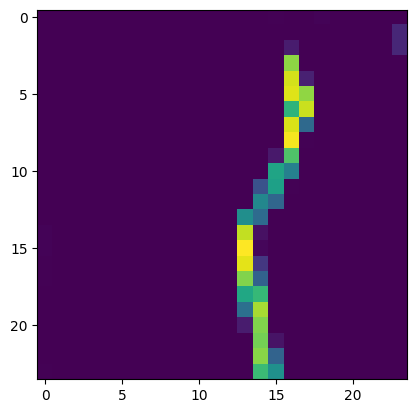

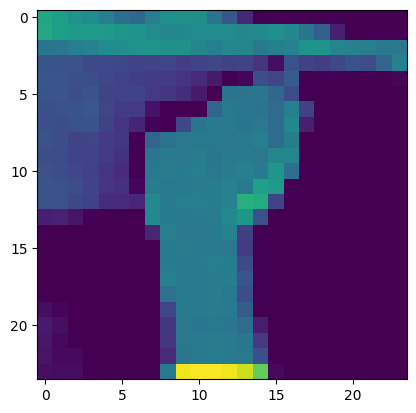

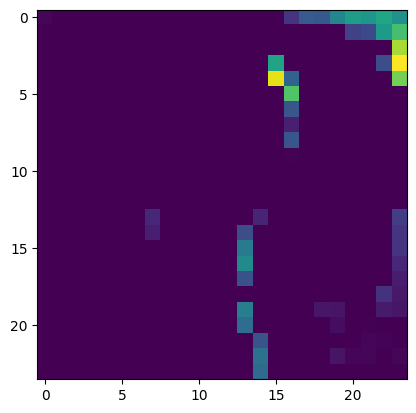

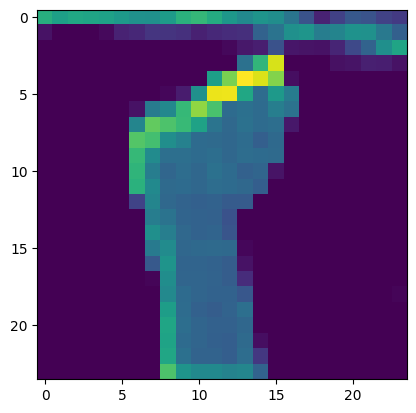

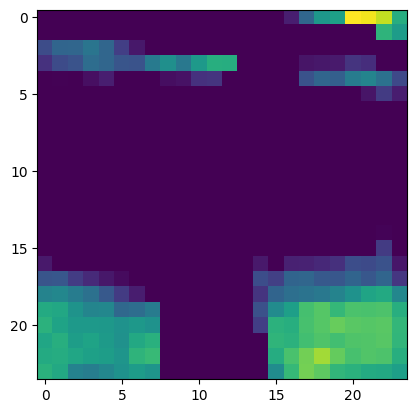

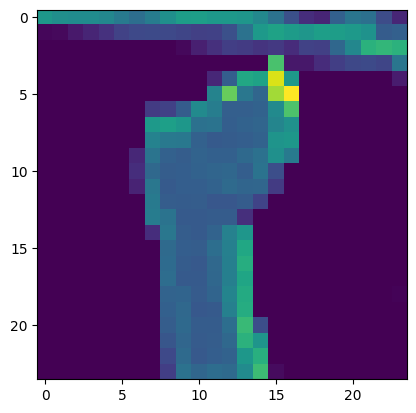

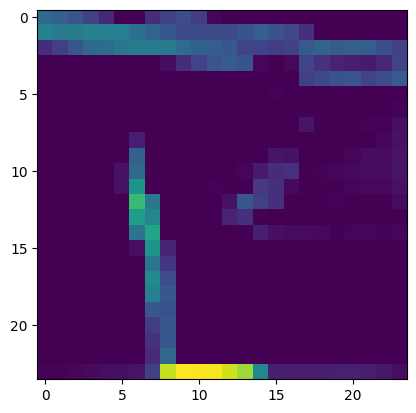

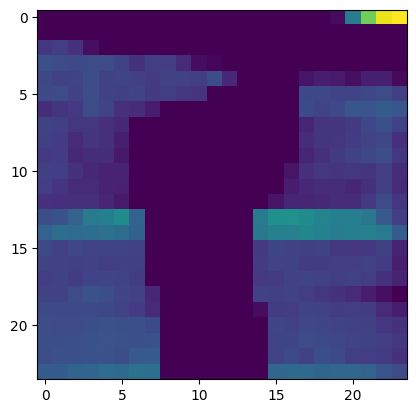

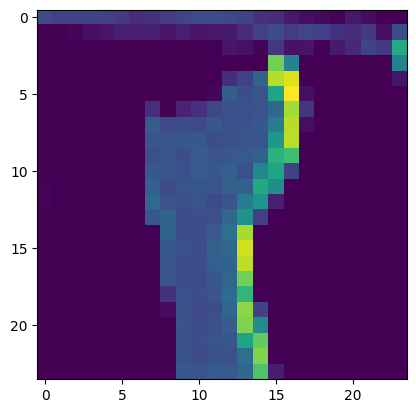

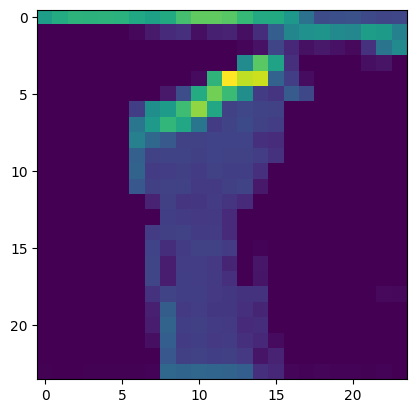

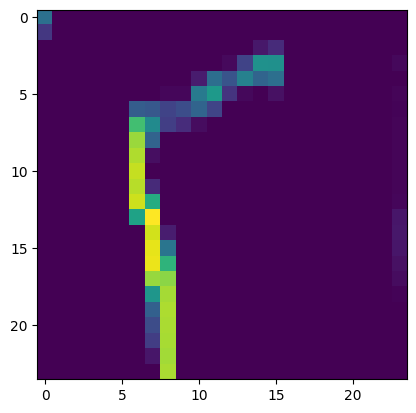

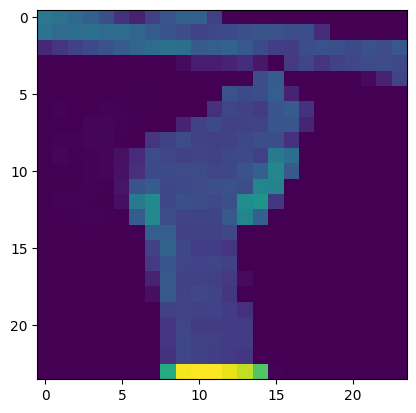

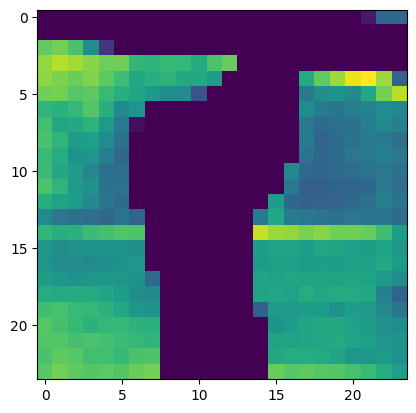

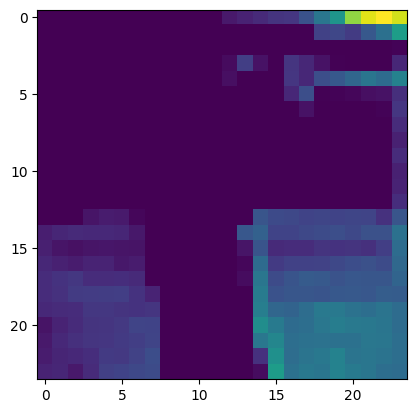

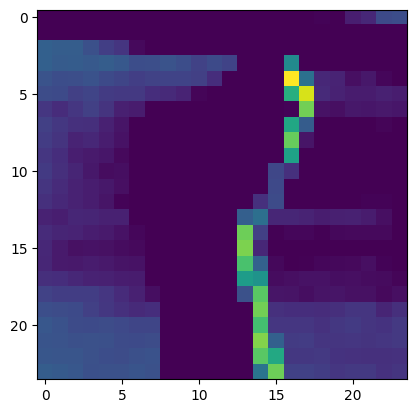

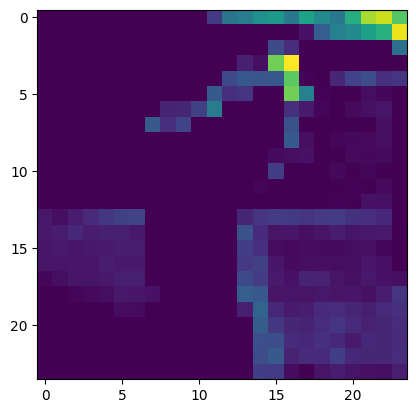

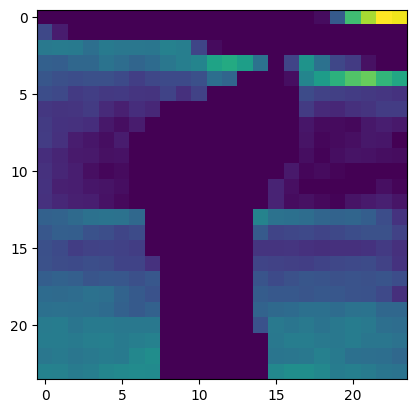

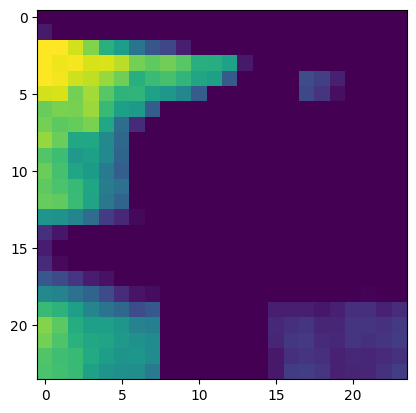

In [8]:
c3 = model.pool(torch.relu(model.conv3(model.pool(torch.relu(model.conv2(model.pool(torch.relu(model.conv1(img))))))))).detach().numpy()

for conv in c3:
    plt.figure()
    plt.imshow(conv)
plt.show()

C:\Users\David\AppData\Local\Temp\ipykernel_26256\4081695117.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


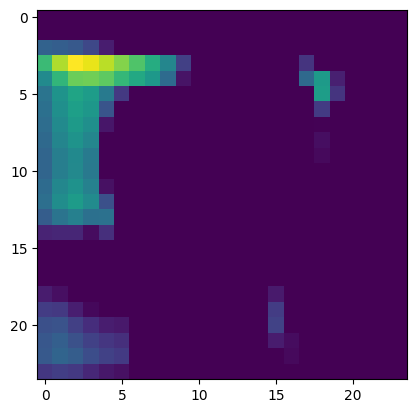

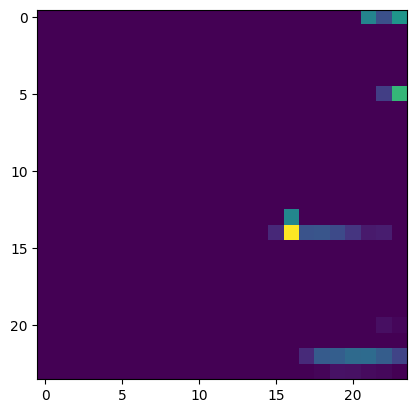

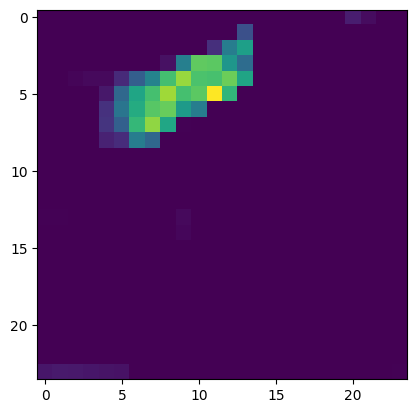

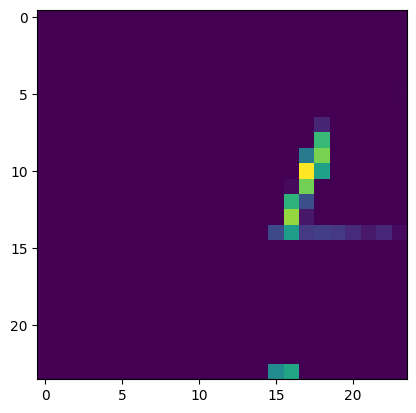

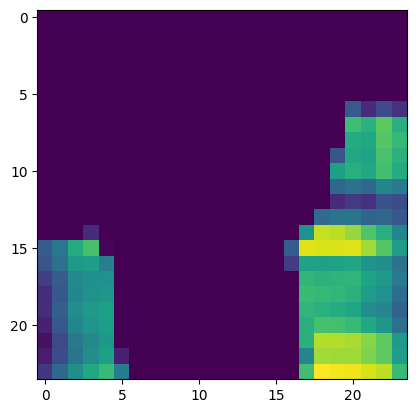

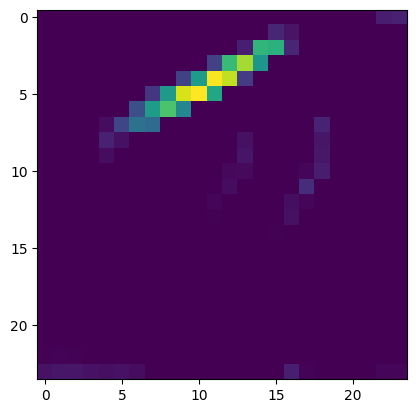

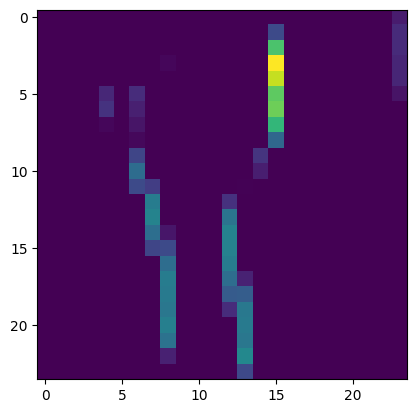

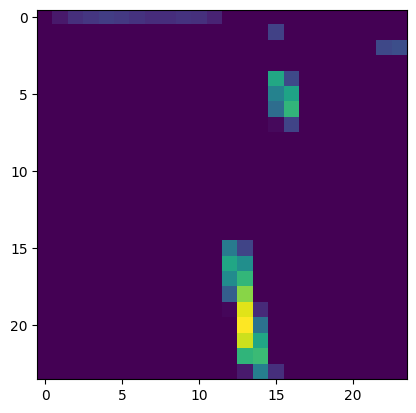

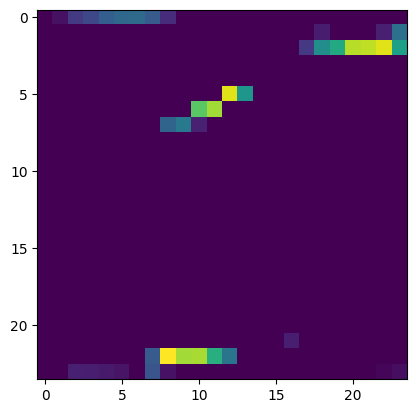

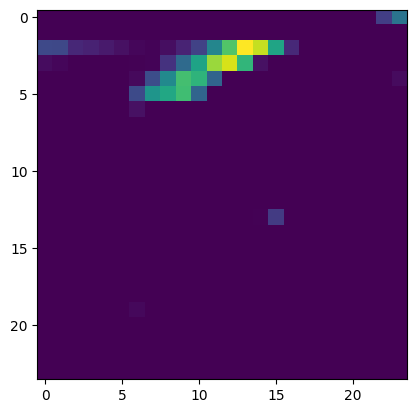

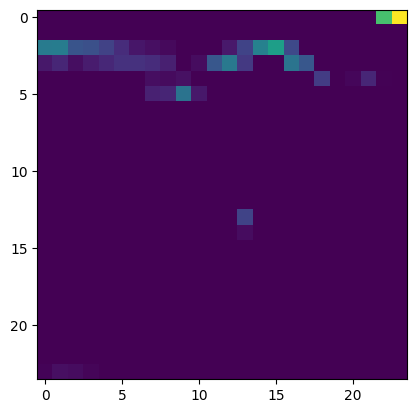

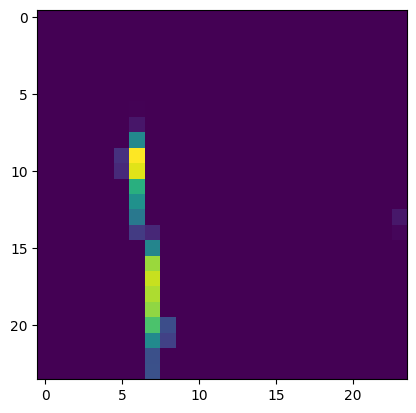

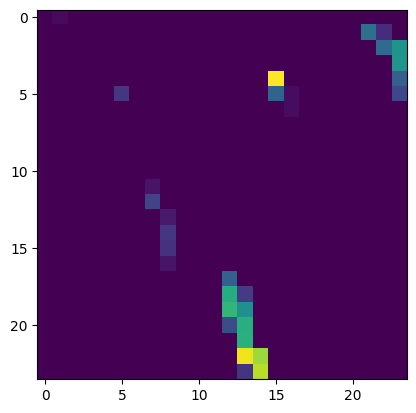

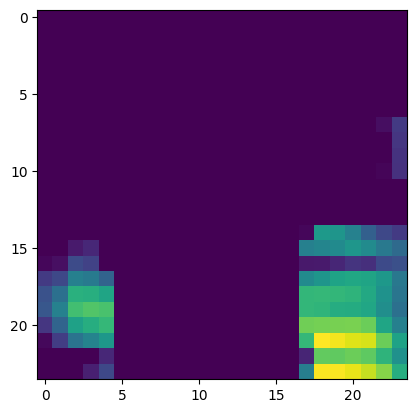

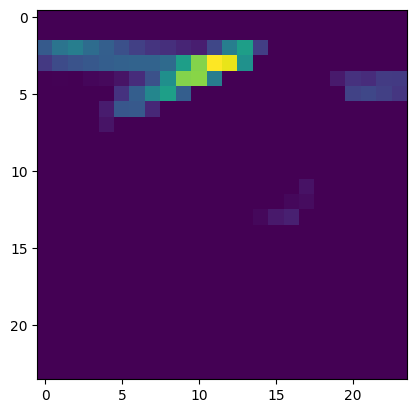

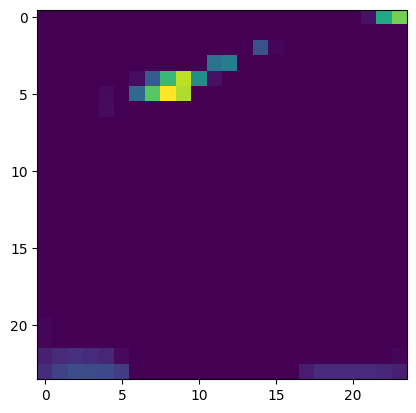

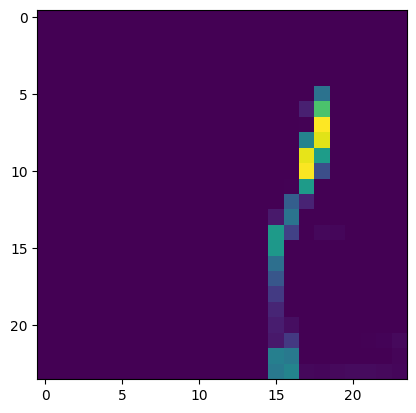

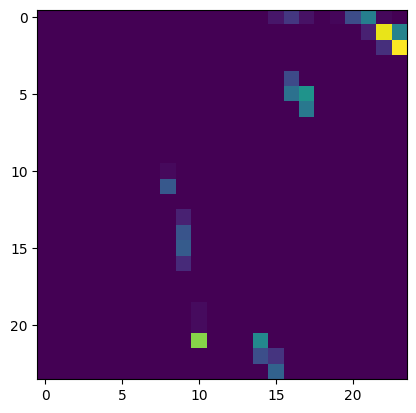

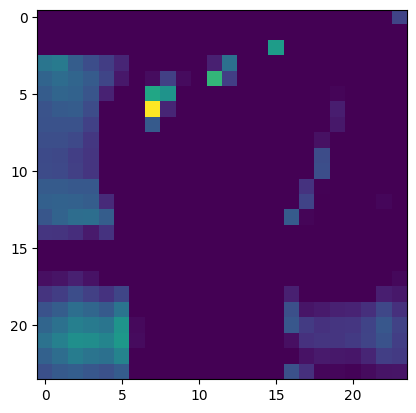

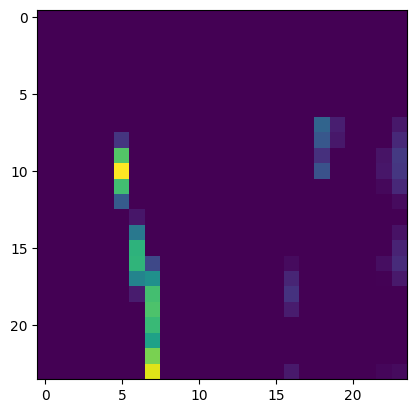

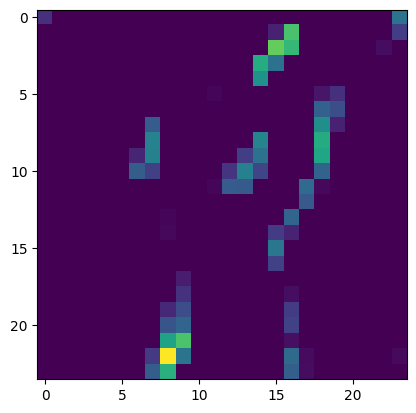

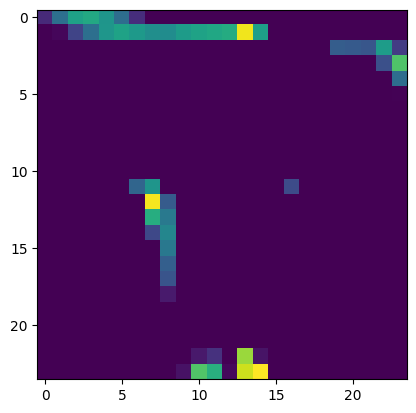

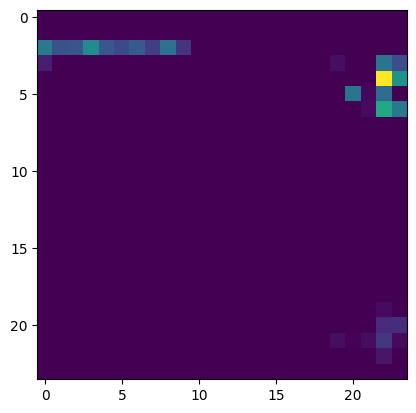

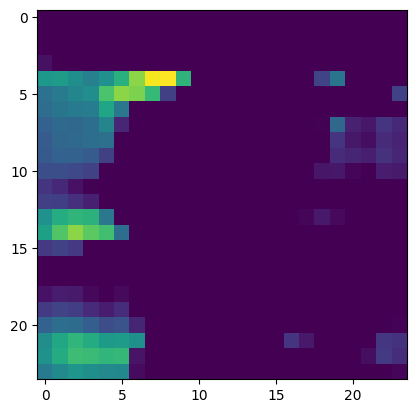

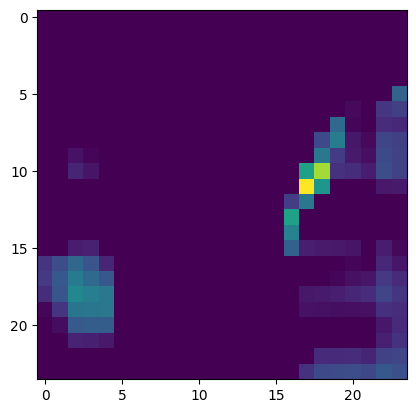

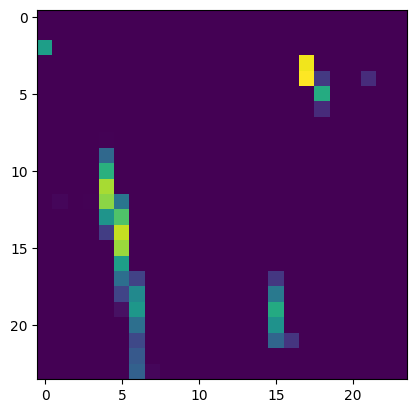

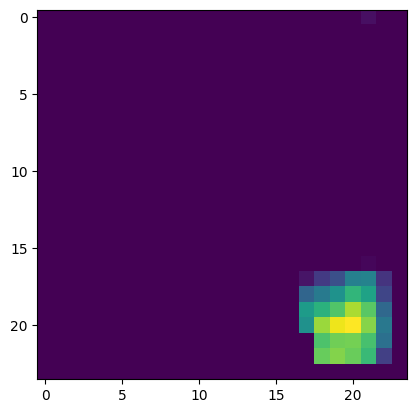

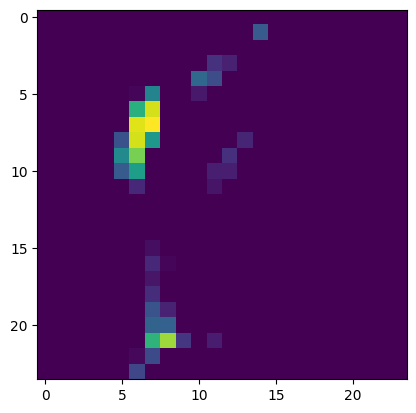

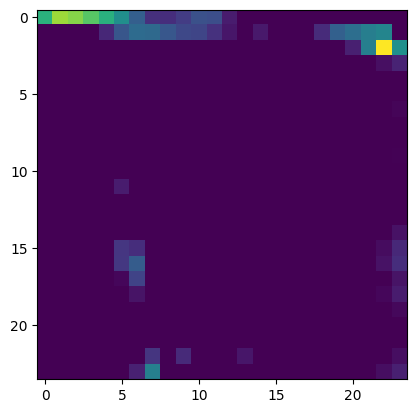

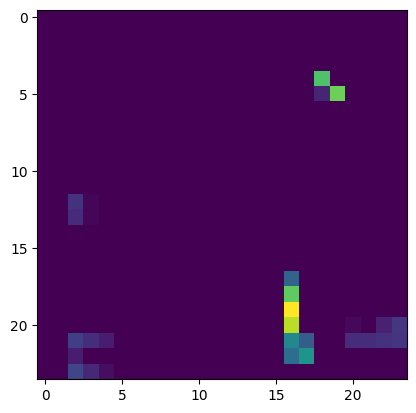

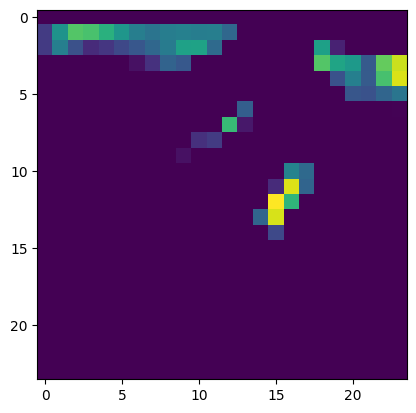

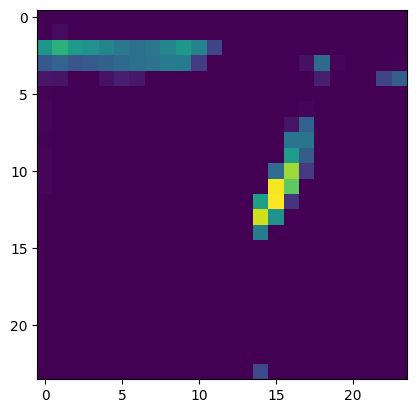

In [9]:
c4 = torch.relu(model.conv4(model.pool(torch.relu(model.conv3(model.pool(torch.relu(model.conv2(model.pool(torch.relu(model.conv1(img))))))))))).detach().numpy()

for conv in c4:
    plt.figure()
    plt.imshow(conv)
plt.show()